In [1]:
from tensorflow.keras import backend
backend.clear_session()

In [2]:
from zipfile import ZipFile

file_name = "mrimages.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done!')

Done!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras import optimizers

from keras.callbacks import Callback, ModelCheckpoint, TensorBoard
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

#import tensorflow_addons as tfa
#from tensorflow.keras.metrics import Metric
#from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typeguard import typechecked
from typing import Optional

# New section

# New section

In [ ]:
# <https://www.kaggle.com/code/amyjang/alzheimer-mri-model-tensorflow-2-3-data-loading>

In [ ]:
# For Model 1_1 and 1_2

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.noise import AlphaDropout
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

from tensorflow.keras import activations, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D, AlphaDropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU, Layer, GlobalAvgPool2D
from keras.callbacks import Callback, ModelCheckpoint, TensorBoard
import tensorflow as tf

#from kaggle_datasets import KaggleDatasets

import PIL

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

Number of replicas: 1
2.8.0


In [ ]:
# Common factor for Model 1 and 2

# For showing train dataset images


In [ ]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# #BATCH_SIZE = 16 * strategy.num_replicas_in_sync
# BATCH_SIZE = 32
# IMAGE_SIZE = [176, 208]
# EPOCHS = 100

In [ ]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     #"../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train",
#     "train",
#     validation_split=0.2,
#     subset="training",
#     seed=1337,
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
# )

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [ ]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     #"../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train",
#     "train",
#     validation_split=0.2,
#     subset="validation",
#     seed=1337,
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
# )

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [ ]:
# class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
# train_ds.class_names = class_names
# val_ds.class_names = class_names

# NUM_CLASSES = len(class_names)

In [ ]:
# NUM_CLASSES

4

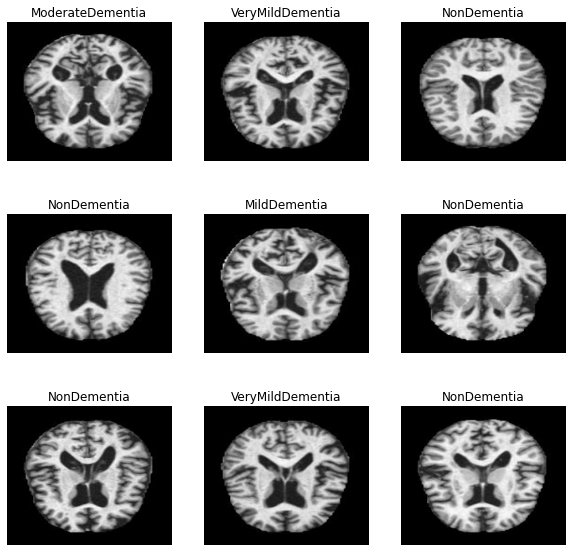

In [ ]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(train_ds.class_names[labels[i]])
#     plt.axis("off")

In [ ]:
# def one_hot_label(image, label):
#     label = tf.one_hot(label, NUM_CLASSES)
#     return image, label

# train_ds = train_ds.map(one_hot_label, num_parallel_calls=AUTOTUNE)
# val_ds = val_ds.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [ ]:
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Model 1 and Model 2 - Up to here and then skip the following steps

In [ ]:
# NUM_IMAGES = []

# for label in class_names:
#     dir_name = "train/" + label[:-2] + 'ed'
#     NUM_IMAGES.append(len([name for name in os.listdir(dir_name)]))

In [ ]:
# NUM_IMAGES

[717, 52, 2560, 1792]

In [ ]:
# Model 1 - Like a GoogLeNet CNN 

In [ ]:
def conv_block(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()    # PK: Testing 1_2 
        
        #tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')   # PK: I added this for Testing 1_1
    ]
    )
    
    return model

In [ ]:
def dense_block(units, dropout_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return model

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

In [ ]:
# This part is from different website "Alzheimer's Classification - CNN - 8"
# PK added

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
with strategy.scope():
    model = build_model()

    #METRICS = [tf.keras.metrics.AUC(name='auc')]
    METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),   # PK Added
      tf.keras.metrics.Precision(name='precision'),       # PK Added
      tf.keras.metrics.Recall(name='recall'),             # PK Added
      tf.keras.metrics.AUC(name='auc'),
        f1_score]   # From Alzheimer's Classification - CNN - 8    # PK Added
    
    model.compile(
        optimizer = 'adam',
        loss = tf.losses.CategoricalCrossentropy(),
        metrics = METRICS
    )

In [ ]:
# Testing 1_1

# model = build_model()

# model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 16)      0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 44, 52, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 22, 26, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 11, 13, 128)       27072     
                                                      

In [ ]:
# Testing 1_2

# model = build_model()

# model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 176, 208, 16)      448       
                                                                 
 conv2d_3 (Conv2D)           (None, 176, 208, 16)      2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 88, 104, 16)      0         
 2D)                                                             
                                                                 
 sequential_8 (Sequential)   (None, 44, 52, 32)        2160      
                                                                 
 sequential_9 (Sequential)   (None, 22, 26, 64)        7392      
                                                                 
 sequential_10 (Sequential)  (None, 11, 13, 128)       27072     
                                                     

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model13.h5",
                                                    save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                     restore_best_weights=True)

tensorboard_cb = TensorBoard(log_dir = 'log13')

In [ ]:
# Testing 1_1

#With this: tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')   
# PK: I added this


# %time

# history = model.fit(
#     train_ds,
#     validation_data = val_ds,
#     callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb],
#     #batch_size = 32,
#     epochs = EPOCHS,
#     verbose = 1
# )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Epoch 1/100
257/257 [==============================] - 36s 78ms/step - loss: 1.0902 - accuracy: 0.7698 - precision: 0.5699 - recall: 0.3222 - auc: 0.7854 - f1_score: 0.4081 - val_loss: 1.8089 - val_accuracy: 0.5737 - val_precision: 0.1475 - val_recall: 0.1475 - val_auc: 0.5427 - val_f1_score: 0.1475 - lr: 0.0100
Epoch 2/100
257/257 [==============================] - 17s 67ms/step - loss: 1.0136 - accuracy: 0.7748 - precision: 0.6014 - recall: 0.2946 - auc: 0.8013 - f1_score: 0.3898 - val_loss: 10.1796 - val_accuracy: 0.7488 - val_precision: 0.4975 - val_recall: 0.4951 - val_auc: 0.6695 - val_f1_score: 0.4962 - lr: 0.0089
Epoch 3/100
257/257 [==============================] - 18s 68ms/step - loss: 0.9742 - accuracy: 0.7838 - precision: 0.6643 - recall: 0.2734 - auc: 0.8108 - f1_score: 0.3839 - val_loss: 0.9588 - val_accuracy: 0.7871 - val_precision: 0.6532 - val_recall: 0.3164 - val_auc: 0.8197 - val_f1_score: 0.4203 - lr: 

In [ ]:
#model = load_model("alzheimer_model10.h5") # rollback to best model

ValueError: ignored

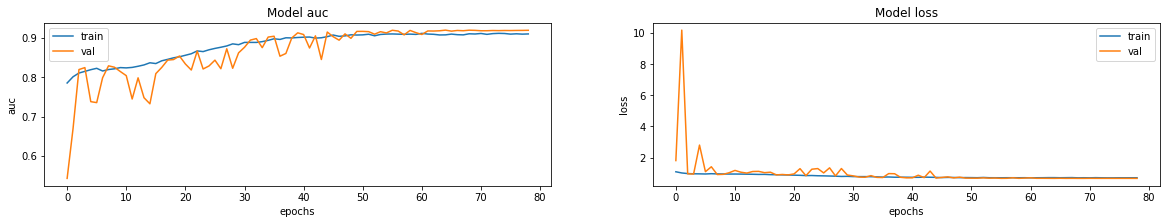

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(20, 3))
# ax = ax.ravel()

# for i, met in enumerate(['auc', 'loss']):
#     ax[i].plot(history.history[met])
#     ax[i].plot(history.history['val_' + met])
#     ax[i].set_title('Model {}'.format(met))
#     ax[i].set_xlabel('epochs')
#     ax[i].set_ylabel(met)
#     ax[i].legend(['train', 'val'])    

In [ ]:
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "test",
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
# )

# test_ds = test_ds.map(one_hot_label, num_parallel_calls=AUTOTUNE)
# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 1279 files belonging to 4 classes.


In [ ]:
# _ = model.evaluate(test_ds)

80/80 [==============================] - 2s 22ms/step - loss: 0.8863 - accuracy: 0.8053 - precision: 0.6299 - recall: 0.5364 - auc: 0.8627 - f1_score: 0.5782


In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

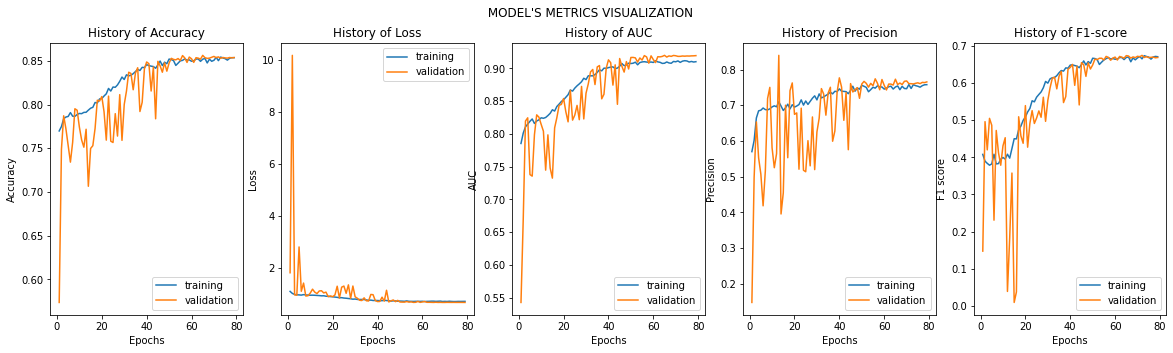

In [ ]:
# Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
#                history.history['loss'],history.history['val_loss'],
#                history.history['auc'],history.history['val_auc'],
#                history.history['precision'],history.history['val_precision'],
#                history.history['f1_score'],history.history['val_f1_score']
#               )

In [ ]:
# scores = model.evaluate_generator(test_ds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
# print("Accuracy = ", scores[1])
# print("Precision = ", scores[2])
# print("Recall = ", scores[3])
# print("AUC = ", scores[4])
# print("F1_score = ", scores[5])

Accuracy =  0.8053166270256042
Precision =  0.6299357414245605
Recall =  0.536356508731842
AUC =  0.862699568271637
F1_score =  0.578165590763092


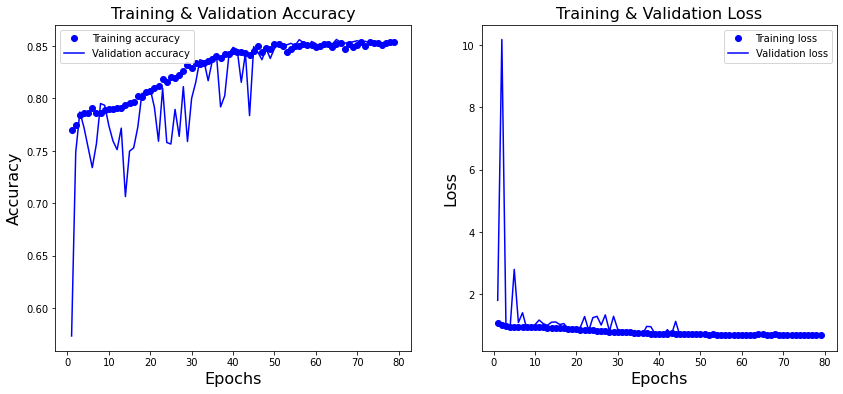

In [ ]:
#import matplotlib.pyplot as plt
  
# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']
# accuracy = history_dict['accuracy']
# val_accuracy = history_dict['val_accuracy']
  
# epochs = range(1, len(loss_values) + 1)
# fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# #
# # Plot the model accuracy vs Epochs
# #
# ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
# ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# ax[0].set_title('Training & Validation Accuracy', fontsize=16)
# ax[0].set_xlabel('Epochs', fontsize=16)
# ax[0].set_ylabel('Accuracy', fontsize=16)
# ax[0].legend()
# #
# # Plot the loss vs Epochs
# #
# ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
# ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
# ax[1].set_title('Training & Validation Loss', fontsize=16)
# ax[1].set_xlabel('Epochs', fontsize=16)
# ax[1].set_ylabel('Loss', fontsize=16)
# ax[1].legend()

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting

# import plotly.graph_objects as go

# fig = go.Figure()
# fig.add_trace(go.Scattergl(y = history.history['loss'], name = 'Train'))
# fig.add_trace(go.Scattergl(y = history.history['val_loss'], name = 'Valid'))
# fig.update_layout(height = 500, width = 700, xaxis_title = 'Epoch', yaxis_title = 'Loss')
# fig.show()

In [ ]:
# scores1 = model.evaluate(train_ds, verbose = 1)

# print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

257/257 [==============================] - 3s 12ms/step - loss: 0.5987 - accuracy: 0.8788 - precision: 0.8174 - recall: 0.6634 - auc: 0.9401 - f1_score: 0.7272
Accuracy on training data: 0.8788137435913086% 
 Error on training data: 0.1211862564086914


In [ ]:
# scores2 = model.evaluate(test_ds, verbose = 1)

# print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

80/80 [==============================] - 1s 14ms/step - loss: 0.8863 - accuracy: 0.8053 - precision: 0.6299 - recall: 0.5364 - auc: 0.8627 - f1_score: 0.5782
Accuracy on test data: 0.8053166270256042% 
 Error on test data: 0.19468337297439575


In [ ]:
'''
PK:

0.00031745433807373047%

There is little underfitting.
It looks good to me since generalizarion error is almost zero.

'''

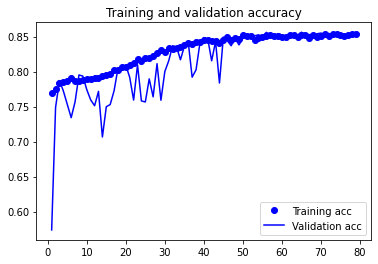

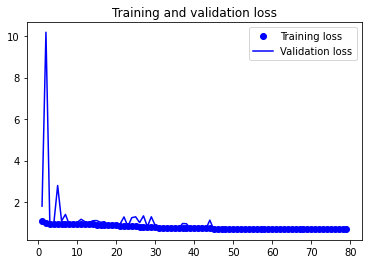

In [ ]:
# #import matplotlib.pyplot as plt 

# #acc = history.history['acc']
# acc = history.history['accuracy'] 
# val_acc = history.history['val_accuracy'] 
# loss = history.history['loss']
# val_loss = history.history['val_loss'] 

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')

# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')

# plt.plot(epochs, val_loss, 'b', label='Validation loss')

# plt.title('Training and validation loss')

# plt.legend()

# plt.show()

In [ ]:
#%load_ext tensorboard

In [ ]:
#%tensorboard --logdir log11

<IPython.core.display.Javascript object>

In [ ]:
#model.save("alzheimer_model11.h5")

In [ ]:
#model.save("log11")

INFO:tensorflow:Assets written to: log11/assets


In [ ]:
# # Model 1_2
# #With this: tf.keras.layers.MaxPool2D()    # Original   

# %time

# history = model.fit(
#     train_ds,
#     validation_data = val_ds,
#     callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb],
#     #batch_size = 32,
#     epochs = EPOCHS,
#     verbose = 1
# )

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch 1/100
257/257 [==============================] - 17s 67ms/step - loss: 0.9426 - accuracy: 0.7925 - precision: 0.6904 - recall: 0.3080 - auc: 0.8260 - f1_score: 0.4220 - val_loss: 7.6594 - val_accuracy: 0.7476 - val_precision: 0.4951 - val_recall: 0.4951 - val_auc: 0.6684 - val_f1_score: 0.4951 - lr: 0.0100
Epoch 2/100
257/257 [==============================] - 17s 67ms/step - loss: 0.9236 - accuracy: 0.7973 - precision: 0.7123 - recall: 0.3173 - auc: 0.8330 - f1_score: 0.4341 - val_loss: 4.5026 - val_accuracy: 0.7476 - val_precision: 0.4951 - val_recall: 0.4951 - val_auc: 0.6934 - val_f1_score: 0.4951 - lr: 0.0089
Epoch 3/100
257/257 [==============================] - 17s 68ms/step - loss: 0.9184 - accuracy: 0.7977 - precision: 0.7105 - recall: 0.3217 - auc: 0.8366 - f1_score: 0.4393 - val_loss: 2.1613 - val_accuracy: 0.7507 - val_precision: 0.5015 - val_recall: 0.4834 - val_auc: 0.7873 - val_f1_score: 0.4917 - lr: 0

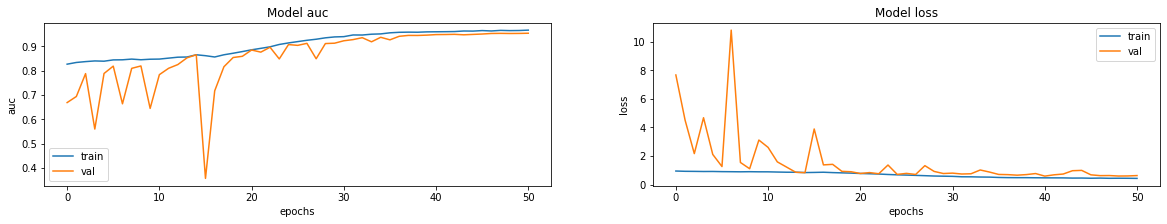

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(20, 3))
# ax = ax.ravel()

# for i, met in enumerate(['auc', 'loss']):
#     ax[i].plot(history.history[met])
#     ax[i].plot(history.history['val_' + met])
#     ax[i].set_title('Model {}'.format(met))
#     ax[i].set_xlabel('epochs')
#     ax[i].set_ylabel(met)
#     ax[i].legend(['train', 'val'])    

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

test_ds = test_ds.map(one_hot_label, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 1279 files belonging to 4 classes.


In [ ]:
# _ = model.evaluate(test_ds)

80/80 [==============================] - 2s 21ms/step - loss: 1.3248 - accuracy: 0.7764 - precision: 0.5542 - recall: 0.5395 - auc: 0.8240 - f1_score: 0.5464


In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

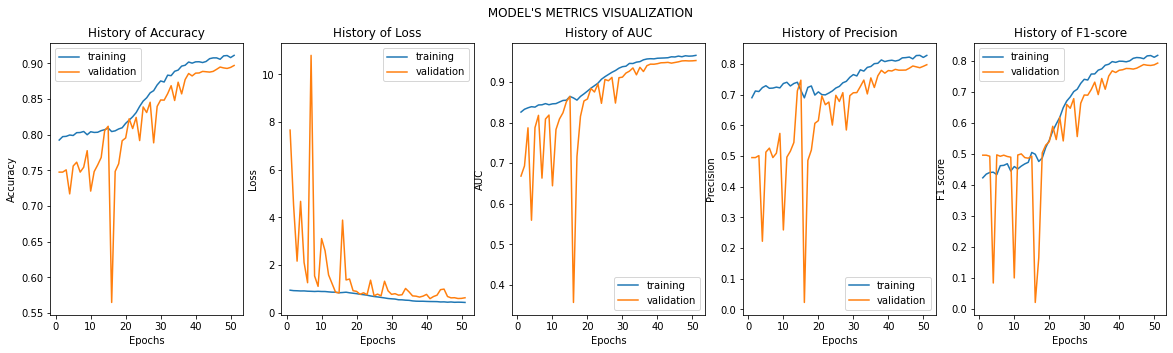

In [ ]:
# Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
#                history.history['loss'],history.history['val_loss'],
#                history.history['auc'],history.history['val_auc'],
#                history.history['precision'],history.history['val_precision'],
#                history.history['f1_score'],history.history['val_f1_score']
#               )

In [ ]:
# scores = model.evaluate_generator(test_ds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
# print("Accuracy = ", scores[1])
# print("Precision = ", scores[2])
# print("Recall = ", scores[3])
# print("AUC = ", scores[4])
# print("F1_score = ", scores[5])

Accuracy =  0.7763878107070923
Precision =  0.5542168617248535
Recall =  0.5394839644432068
AUC =  0.8240324258804321
F1_score =  0.5463944673538208


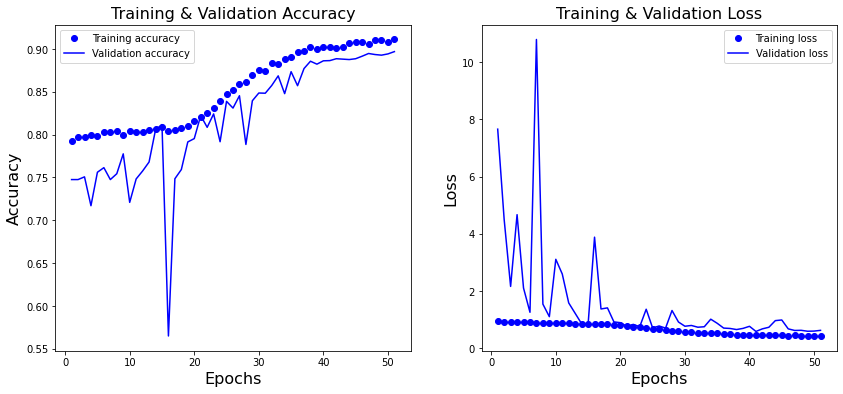

In [ ]:
#import matplotlib.pyplot as plt
  
# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']
# accuracy = history_dict['accuracy']
# val_accuracy = history_dict['val_accuracy']
  
# epochs = range(1, len(loss_values) + 1)
# fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# #
# # Plot the model accuracy vs Epochs
# #
# ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
# ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# ax[0].set_title('Training & Validation Accuracy', fontsize=16)
# ax[0].set_xlabel('Epochs', fontsize=16)
# ax[0].set_ylabel('Accuracy', fontsize=16)
# ax[0].legend()
# #
# # Plot the loss vs Epochs
# #
# ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
# ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
# ax[1].set_title('Training & Validation Loss', fontsize=16)
# ax[1].set_xlabel('Epochs', fontsize=16)
# ax[1].set_ylabel('Loss', fontsize=16)
# ax[1].legend()

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting

# import plotly.graph_objects as go

# fig = go.Figure()
# fig.add_trace(go.Scattergl(y = history.history['loss'], name = 'Train'))
# fig.add_trace(go.Scattergl(y = history.history['val_loss'], name = 'Valid'))
# fig.update_layout(height = 500, width = 700, xaxis_title = 'Epoch', yaxis_title = 'Loss')
# fig.show()

In [ ]:
# scores1 = model.evaluate(train_ds, verbose = 1)

# print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

257/257 [==============================] - 3s 12ms/step - loss: 0.3342 - accuracy: 0.9458 - precision: 0.8970 - recall: 0.8845 - auc: 0.9847 - f1_score: 0.8910
Accuracy on training data: 0.9457529783248901% 
 Error on training data: 0.05424702167510986


In [ ]:
# scores2 = model.evaluate(test_ds, verbose = 1)

# print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

80/80 [==============================] - 1s 13ms/step - loss: 1.3248 - accuracy: 0.7764 - precision: 0.5542 - recall: 0.5395 - auc: 0.8240 - f1_score: 0.5464
Accuracy on test data: 0.7763878107070923% 
 Error on test data: 0.22361218929290771


In [ ]:
'''
PK:

0.00031745433807373047%

There is little underfitting.
It looks good to me since generalizarion error is almost zero.

'''

In [ ]:
# #import matplotlib.pyplot as plt 

# #acc = history.history['acc']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

NameError: ignored

In [ ]:
#%load_ext tensorboard

In [ ]:
#%tensorboard --logdir log13

<IPython.core.display.Javascript object>

In [ ]:
model.save("alzheimer_model13.h5")

In [ ]:
model.save("log13")

INFO:tensorflow:Assets written to: log13/assets


In [ ]:
# Model 2 continues

# Grid seaech for activation function = ['sigmoid', 'relu', 'elu', 'leaky-relu', 'selu', 'gelu']

# <https://mlfromscratch.com/activation-functions-explained/#/>

In [ ]:
#input_shape = (224, 224, 3)
input_shape = (176, 208, 3)

def build_cnn(activation,
              dropout_rate,
              optimizer):
    model = Sequential()
    
    if(activation == 'selu'):
        model.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation,
                  input_shape=input_shape,
                  kernel_initializer='lecun_normal'))
        model.add(Conv2D(64, (3, 3), activation=activation, 
                         kernel_initializer='lecun_normal'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(AlphaDropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        #model.add(Dense(10, activation='softmax'))
        model.add(Dense(4, activation='softmax'))
    else:
        model.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation,
                  input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=activation))
        model.add(Dropout(0.5))
        #model.add(Dense(10, activation='softmax'))
        model.add(Dense(4, activation='softmax'))
    
    model.compile(
        #loss='binary_crossentropy', 
        #loss='categorical_crossentropy',
        loss='sparse_categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    
    return model

In [ ]:
from tensorflow.keras.utils import get_custom_objects

In [ ]:
# Add the GELU function to Keras
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'gelu': Activation(gelu)})

# Add leaky-relu so we can use it as a string
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})

act_func = ['sigmoid', 'relu', 'elu', 'leaky-relu', 'selu', 'gelu']

In [ ]:
# %time

# result = []

# for activation in act_func:
#     print('\nTraining with -->{0}<-- activation function\n'.format(activation))
    
#     model = build_cnn(activation=activation,
#                       dropout_rate=0.2,
#                       optimizer=Adam(clipvalue=0.5))
    
#     history = model.fit(#x_train, y_train,
#                         train_ds,  
#                         validation_data = val_ds,
#                         #validation_split=0.20,
#                         #batch_size=128, # 128 is faster, but less accurate. 16/32 recommended
#                         batch_size=32, # 128 is faster, but less accurate. 16/32 recommended
#                         epochs=EPOCHS,
#                         #epochs=100,
#                         #verbose=1,
#                         #validation_data=(x_test, y_test))
#                         verbose=1)
    
#     result.append(history)
    
#     K.clear_session()
#     del model

# print(result)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs

Training with -->sigmoid<-- activation function

Epoch 1/30
257/257 [==============================] - 28s 65ms/step - loss: 1.3897 - accuracy: 0.4223 - val_loss: 1.0413 - val_accuracy: 0.4951
Epoch 2/30
257/257 [==============================] - 16s 61ms/step - loss: 1.1355 - accuracy: 0.4481 - val_loss: 1.0406 - val_accuracy: 0.4951
Epoch 3/30
257/257 [==============================] - 16s 61ms/step - loss: 1.0913 - accuracy: 0.4584 - val_loss: 1.0405 - val_accuracy: 0.4951
Epoch 4/30
257/257 [==============================] - 16s 61ms/step - loss: 1.0676 - accuracy: 0.4738 - val_loss: 1.0396 - val_accuracy: 0.4951
Epoch 5/30
257/257 [==============================] - 16s 61ms/step - loss: 1.0562 - accuracy: 0.4845 - val_loss: 1.0395 - val_accuracy: 0.4951
Epoch 6/30
257/257 [==============================] - 16s 63ms/step - loss: 1.0538 - accuracy: 0.4952 - val_loss: 1.0401 - val_accuracy: 0.4951
Epoch 7/30
257/257 [==

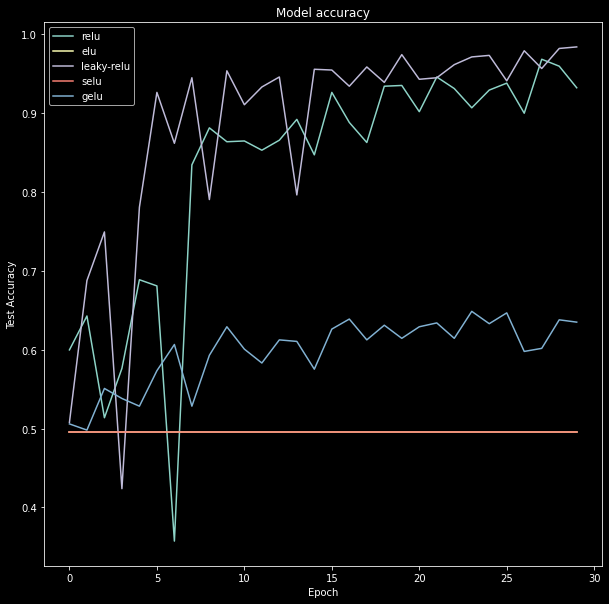

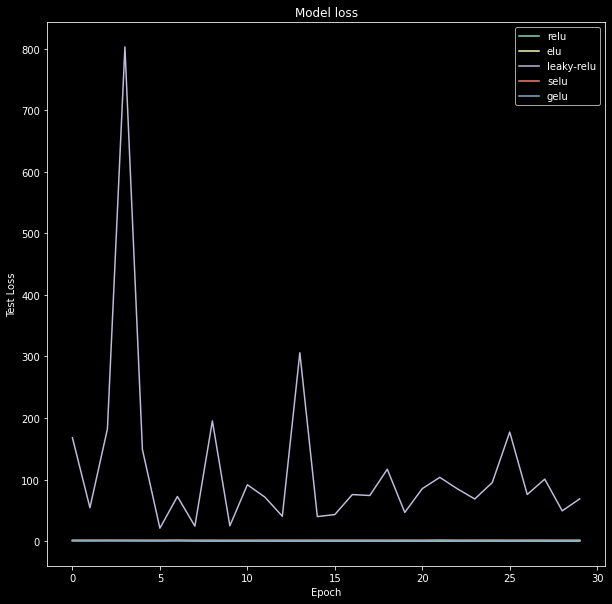

In [ ]:
# new_act_arr = act_func[1:]
# new_results = result[1:]

# def plot_act_func_results(results, activation_functions = []):
#     plt.figure(figsize=(10,10))
#     plt.style.use('dark_background')
    
#     # Plot validation accuracy values
#     for act_func in results:
#         #plt.plot(act_func.history['val_acc'])
#         plt.plot(act_func.history['val_accuracy'])
                
#     plt.title('Model accuracy')
#     plt.ylabel('Test Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(activation_functions)
#     plt.show()

#     # Plot validation loss values
#     plt.figure(figsize=(10,10))
    
#     for act_func in results:
#         plt.plot(act_func.history['val_loss'])
        
#     plt.title('Model loss')
#     plt.ylabel('Test Loss')
#     plt.xlabel('Epoch')
#     plt.legend(activation_functions)
#     plt.show()

# plot_act_func_results(new_results, new_act_arr)

In [ ]:
# Grid seaech for activation function = ['sigmoid', 'relu', 'elu', 'leaky-relu', 'selu', 'gelu'] up to here

In [ ]:
# 3_1. VGG16

# Done on 25/05/2022

In [ ]:
# import keras,os
# from keras.models import Sequential

# from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D, AlphaDropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# import numpy as np

In [ ]:
#IMAGE_SIZE = (224, 224)
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 4
EPOCHS = 100

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = 'train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   #subset = 'training',
                                                   batch_size = 32)

Found 5121 images belonging to 4 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = 'test',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 32)

Found 1279 images belonging to 4 classes.


In [ ]:
# trdata = ImageDataGenerator()
# traindata = trdata.flow_from_directory(#directory = "C:/Users/DATA/CAPSTONE_PROJECT_PRESENTATION/train",
#                                        directory = "train",
#                                        target_size = (224, 224))

Found 5121 images belonging to 4 classes.


In [ ]:
# tsdata = ImageDataGenerator()
# testdata = tsdata.flow_from_directory(#directory = "C:/Users/DATA/CAPSTONE_PROJECT_PRESENTATION/test",
#                                       directory = "test", 
#                                       target_size = (224, 224))

Found 1279 images belonging to 4 classes.


In [ ]:
def conv_block1(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2))    
        ])
    
    return model    

In [ ]:
def conv_block2(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2))    
        ])
    
    return model      

In [ ]:
def dense_block(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(filters, activation='relu')])
    
    return model

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        #tf.keras.Input(shape=(*IMAGE_SIZE, 3)),
        tf.keras.Input(shape = INPUT_SHAPE),
        conv_block1(64),
        conv_block1(128),
        
        conv_block2(256),
        conv_block2(512),
        conv_block2(512),
        
        tf.keras.layers.Flatten(),
        
        dense_block(256),
        dense_block(128),
                
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 112, 112, 64)      38720     
                                                                 
 sequential_9 (Sequential)   (None, 56, 56, 128)       221440    
                                                                 
 sequential_10 (Sequential)  (None, 28, 28, 256)       1475328   
                                                                 
 sequential_11 (Sequential)  (None, 14, 14, 512)       5899776   
                                                                 
 sequential_12 (Sequential)  (None, 7, 7, 512)         7079424   
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 sequential_13 (Sequential)  (None, 256)             

In [ ]:
# This part is from different website "Alzheimer's Classification - CNN - 8"

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score]   # From Alzheimer's Classification - CNN - 8

In [ ]:
#opt = Adam(lr=0.001)
#opt = Adam(learning_rate=0.001)

opt = Adam(learning_rate = 0.001, 
           beta_1 = 0.9, 
           beta_2 = 0.999, 
           epsilon = 1e-07, 
           amsgrad = False,
           name = 'Adam')    # NameError: name 'Adam' is not defined. Before not now.
          #amsgrad = False,)

#model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])



# model.compile(optimizer = tf.keras.optimizers.Adam(
#     learning_rate = 0.001, 
#     beta_1 = 0.9, 
#     beta_2 = 0.999, 
#     epsilon = 1e-07, 
#     amsgrad = False,
#     name = 'Adam',), 
#     loss = 'categorical_crossentropy',
#     metrics = METRICS)

In [ ]:
model.compile(optimizer = opt, 
              loss = tf.keras.losses.categorical_crossentropy, 
              metrics = METRICS)

In [ ]:
checkpoint = ModelCheckpoint("vgg16_2.h5", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             #period=1) 
                             save_freq=1)

In [ ]:
# early = EarlyStopping(monitor='val_accuracy', 
#                       min_delta=0, 
#                       patience=20, 
#                       #patience=5, 
#                       verbose=1, 
#                       mode='auto')

In [ ]:
# 3_2. VGG16

# Try again for better results on 26/05/2022
# with the following settings

early = EarlyStopping(monitor='auc', 
                      min_delta=0, 
                      #patience=20, 
                      patience=10, 
                      #patience=5, 
                      verbose=1, 
                      mode='auto')

In [ ]:
# hist = model.fit_generator(steps_per_epoch=160,
#                            #steps_per_epoch=10,
#                            generator=traindata, 
#                            validation_data= testdata, 
#                            validation_steps=40,
#                            #validation_steps=1, 
#                            epochs=100,
#                            #epochs=10, 
#                            callbacks=[checkpoint,early])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



160/160 [==============================] - 87s 497ms/step - loss: 175.5844 - accuracy: 0.7485 - precision: 0.4936 - recall: 0.2338 - auc: 0.7689 - f1_score: 0.2414 - val_loss: 1.0328 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7806 - val_f1_score: 0.0000e+00
Epoch 2/100
160/160 [==============================] - 75s 470ms/step - loss: 1.0426 - accuracy: 0.7519 - precision: 0.5088 - recall: 0.2160 - auc: 0.7803 - f1_score: 0.2155 - val_loss: 1.0381 - val_accuracy: 0.7502 - val_precision: 0.5004 - val_recall: 0.5004 - val_auc: 0.7806 - val_f1_score: 0.5005
Epoch 3/100
160/160 [==============================] - 75s 471ms/step - loss: 1.0416 - accuracy: 0.7476 - precision: 0.4914 - recall: 0.2688 - auc: 0.7789 - f1_score: 0.2672 - val_loss: 1.0348 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7806 - val_f1_score: 0.0000e+00
Epoch 4/100
160/160 [==============================] - 76s 473ms/step - loss: 1.

In [ ]:
# # 3_2. VGG16

# # Try again for better results on 26/05/2022
# # with the following settings

# hist = model.fit_generator(#steps_per_epoch=160,
#                            #steps_per_epoch=10,
#                            generator=traindata, 
#                            validation_data= testdata, 
#                            #validation_steps=40,
#                            #validation_steps=1, 
#                            epochs=100,
#                            #epochs=10, 
#                            callbacks=[checkpoint,early])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


161/161 [==============================] - 97s 486ms/step - loss: 36.7229 - accuracy: 0.7465 - precision: 0.4818 - recall: 0.1865 - auc: 0.7598 - f1_score: 0.1854 - val_loss: 1.0361 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7806 - val_f1_score: 0.0000e+00
Epoch 2/100
161/161 [==============================] - 76s 472ms/step - loss: 1.0434 - accuracy: 0.7497 - precision: 0.4982 - recall: 0.1650 - auc: 0.7788 - f1_score: 0.1640 - val_loss: 1.0338 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7806 - val_f1_score: 0.0000e+00
Epoch 3/100
161/161 [==============================] - 76s 473ms/step - loss: 1.0408 - accuracy: 0.7496 - precision: 0.4980 - recall: 0.2148 - auc: 0.7786 - f1_score: 0.2135 - val_loss: 1.0449 - val_accuracy: 0.7502 - val_precision: 0.5004 - val_recall: 0.5004 - val_auc: 0.7806 - val_f1_score: 0.5003
Epoch 4/100
161/161 [==============================] - 76s 473ms/step - loss: 1.0

In [ ]:
# 3_3. VGG16

# Try again for better results on 26/05/2022
# with the following settings

history = model.fit_generator(generator = train_dataset, 
                              validation_data = test_dataset, 
                              epochs = 100,
                              callbacks = [checkpoint, early]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/100


TypeError: ignored

In [ ]:
%time

history = model.fit(train_dataset,
                    validation_data = test_dataset,
                    callbacks = [checkpoint, early],
                    batch_size = 32,
                    epochs = 100)                                      

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Epoch 1/100


TypeError: ignored

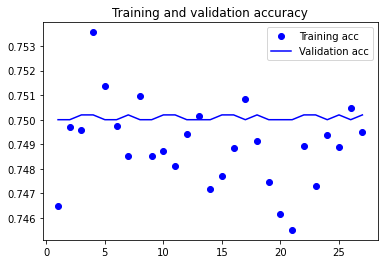

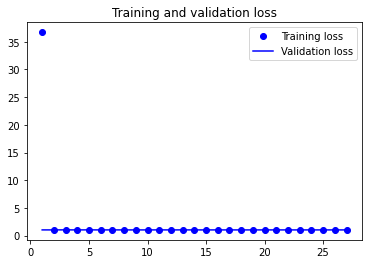

In [ ]:
# #import matplotlib.pyplot as plt 

# # #acc = history.history['acc']
# acc = history.history['accuracy'] 
# val_acc = history.history['val_accuracy'] 
# loss = history.history['loss']
# val_loss = history.history['val_loss'] 

# acc = hist.history['accuracy'] 
# val_acc = hist.history['val_accuracy'] 
# loss = hist.history['loss']
# val_loss = hist.history['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')

# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')

# plt.plot(epochs, val_loss, 'b', label='Validation loss')

# plt.title('Training and validation loss')

# plt.legend()

# plt.show()

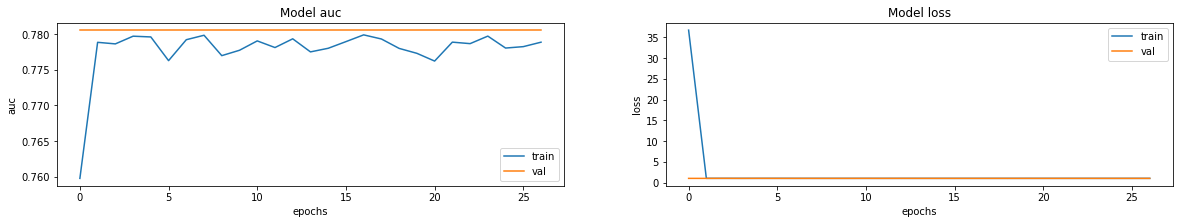

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(20, 3))
# ax = ax.ravel()

# for i, met in enumerate(['auc', 'loss']):
#     #ax[i].plot(history.history[met])
#     #ax[i].plot(history.history['val_' + met])
#     ax[i].plot(hist.history[met])
#     ax[i].plot(hist.history['val_' + met])
#     ax[i].set_title('Model {}'.format(met))
#     ax[i].set_xlabel('epochs')
#     ax[i].set_ylabel(met)
#     ax[i].legend(['train', 'val'])    

In [ ]:
# This shows underfitting?

In [ ]:
# _ = model.evaluate(testdata)

40/40 [==============================] - 6s 146ms/step - loss: 1.0342 - accuracy: 0.7502 - precision: 0.5004 - recall: 0.5004 - auc: 0.7806 - f1_score: 0.5004


In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

# def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
#     fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
#     fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

#     ax1.plot(range(1, len(acc) + 1), acc)
#     ax1.plot(range(1, len(val_acc) + 1), val_acc)
#     ax1.set_title('History of Accuracy')
#     ax1.set_xlabel('Epochs')
#     ax1.set_ylabel('Accuracy')
#     ax1.legend(['training', 'validation'])


#     ax2.plot(range(1, len(loss) + 1), loss)
#     ax2.plot(range(1, len(val_loss) + 1), val_loss)
#     ax2.set_title('History of Loss')
#     ax2.set_xlabel('Epochs')
#     ax2.set_ylabel('Loss')
#     ax2.legend(['training', 'validation'])
    
#     ax3.plot(range(1, len(auc) + 1), auc)
#     ax3.plot(range(1, len(val_auc) + 1), val_auc)
#     ax3.set_title('History of AUC')
#     ax3.set_xlabel('Epochs')
#     ax3.set_ylabel('AUC')
#     ax3.legend(['training', 'validation'])
    
#     ax4.plot(range(1, len(precision) + 1), precision)
#     ax4.plot(range(1, len(val_precision) + 1), val_precision)
#     ax4.set_title('History of Precision')
#     ax4.set_xlabel('Epochs')
#     ax4.set_ylabel('Precision')
#     ax4.legend(['training', 'validation'])
    
#     ax5.plot(range(1, len(f1) + 1), f1)
#     ax5.plot(range(1, len(val_f1) + 1), val_f1)
#     ax5.set_title('History of F1-score')
#     ax5.set_xlabel('Epochs')
#     ax5.set_ylabel('F1 score')
#     ax5.legend(['training', 'validation'])


#     plt.show()

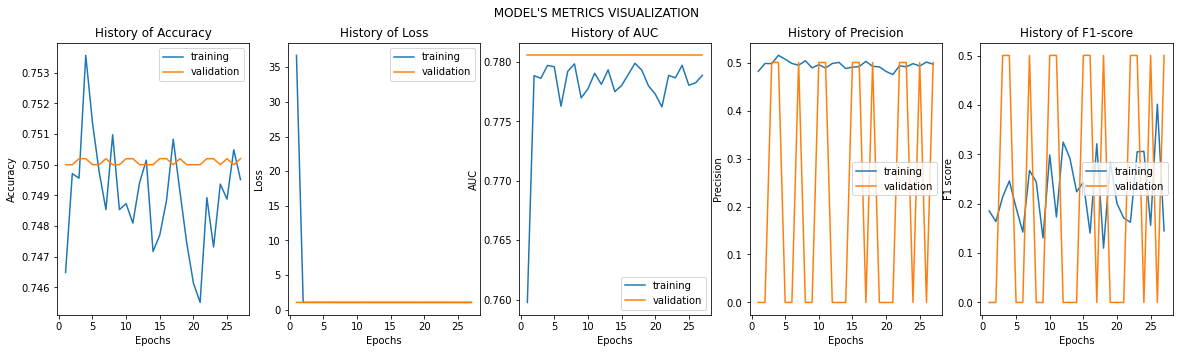

In [ ]:
# Train_Val_Plot(hist.history['accuracy'],hist.history['val_accuracy'],
#                hist.history['loss'],hist.history['val_loss'],
#                hist.history['auc'],hist.history['val_auc'],
#                hist.history['precision'],hist.history['val_precision'],
#                hist.history['f1_score'],hist.history['val_f1_score']
              )

In [ ]:
# scores = model.evaluate_generator(testdata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
# print("Accuracy = ", scores[1])
# print("Precision = ", scores[2])
# print("Recall = ", scores[3])
# print("AUC = ", scores[4])
# print("F1_score = ", scores[5])

Accuracy =  0.7501954436302185
Precision =  0.5003909468650818
Recall =  0.5003909468650818
AUC =  0.7805577516555786
F1_score =  0.5004031658172607


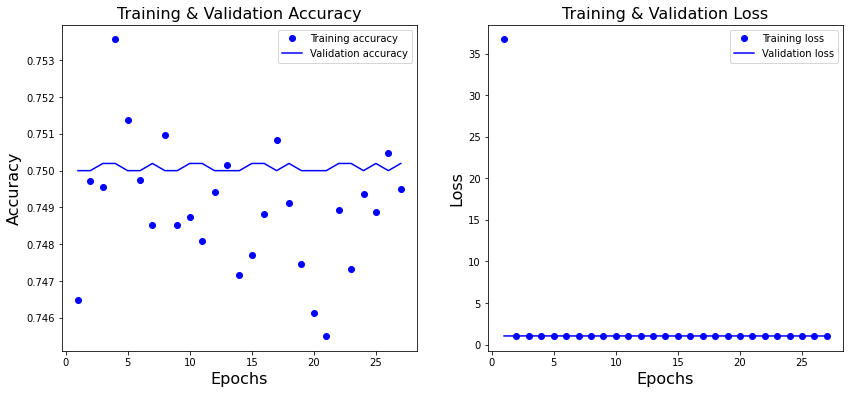

In [ ]:
#import matplotlib.pyplot as plt
  
# history_dict = hist.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']
# accuracy = history_dict['accuracy']
# val_accuracy = history_dict['val_accuracy']
  
# epochs = range(1, len(loss_values) + 1)
# fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# #
# # Plot the model accuracy vs Epochs
# #
# ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
# ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# ax[0].set_title('Training & Validation Accuracy', fontsize=16)
# ax[0].set_xlabel('Epochs', fontsize=16)
# ax[0].set_ylabel('Accuracy', fontsize=16)
# ax[0].legend()
# #
# # Plot the loss vs Epochs
# #
# ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
# ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
# ax[1].set_title('Training & Validation Loss', fontsize=16)
# ax[1].set_xlabel('Epochs', fontsize=16)
# ax[1].set_ylabel('Loss', fontsize=16)
# ax[1].legend()

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting

# import plotly.graph_objects as go

# fig = go.Figure()
# fig.add_trace(go.Scattergl(y = hist.history['loss'], name = 'Train'))
# fig.add_trace(go.Scattergl(y = hist.history['val_loss'], name = 'Valid'))
# fig.update_layout(height = 500, width = 700, xaxis_title = 'Epoch', yaxis_title = 'Loss')
# fig.show()

In [ ]:
# scores1 = model.evaluate(traindata, verbose = 1)

# print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

161/161 [==============================] - 24s 146ms/step - loss: 1.0369 - accuracy: 0.7500 - precision: 0.4999 - recall: 0.4999 - auc: 0.7799 - f1_score: 0.5029
Accuracy on training data: 0.749951183795929% 
 Error on training data: 0.25004881620407104


In [ ]:
# scores2 = model.evaluate(testdata, verbose = 1)

# print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 6s 147ms/step - loss: 1.0342 - accuracy: 0.7502 - precision: 0.5004 - recall: 0.5004 - auc: 0.7806 - f1_score: 0.5004
Accuracy on test data: 0.7501954436302185% 
 Error on test data: 0.2498045563697815


In [ ]:
'''
PK:

0.00031745433807373047%

There is little underfitting.
It looks good to me since generalizarion error is almost zero.

'''

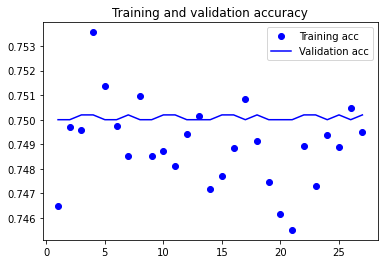

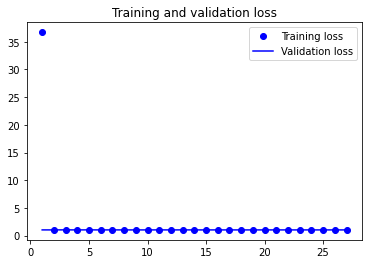

In [ ]:
# #import matplotlib.pyplot as plt 

# #acc = hist.history['acc']

# acc = hist.history['accuracy'] 
# val_acc = hist.history['val_accuracy'] 
# loss = hist.history['loss']
# val_loss = hist.history['val_loss'] 

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')

# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')

# plt.plot(epochs, val_loss, 'b', label='Validation loss')

# plt.title('Training and validation loss')

# plt.legend()

# plt.show()

In [ ]:
#%load_ext tensorboard

In [ ]:
#%tensorboard --logdir log11

<IPython.core.display.Javascript object>

In [ ]:
# model.save("vgg16_1.h5")

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Common parts

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [5]:
train_dataset  = train_datagen.flow_from_directory(directory = 'train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 4098 images belonging to 4 classes.


In [6]:
valid_dataset = valid_datagen.flow_from_directory(directory = 'train',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 32)

Found 1023 images belonging to 4 classes.


In [7]:
test_dataset = test_datagen.flow_from_directory(directory = 'test',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 32)

Found 1279 images belonging to 4 classes.


In [ ]:
# Common parts

In [ ]:
'''
Deﬁning  a  1  VGG  block  model + Data Augmentation.

'''

In [ ]:
# define cnn model 

def define_model():
  model = Sequential()
  
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

  model.add(Dense(4, activation='softmax')) 
  
  return model

In [ ]:
model = define_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 128)               51380352  
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                        

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5",
#                                                     save_best_only=True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     monitor='auc',
                                                     mode='auto',
                                                     restore_best_weights=True)

In [ ]:
# compile model

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_dataset,
                  validation_data=valid_dataset,
                  epochs = 30,
                  verbose = 1,
                  callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
129/129 [==============================] - 51s 394ms/step - loss: 1.0481 - accuracy: 0.7504 - precision: 0.5018 - recall: 0.2072 - auc: 0.7805 - f1_score: 0.2185 - val_loss: 1.0367 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7861 - val_f1_score: 0.5005 - lr: 0.0100
Epoch 2/30
129/129 [==============================] - 58s 449ms/step - loss: 1.0401 - accuracy: 0.7510 - precision: 0.5040 - recall: 0.2635 - auc: 0.7799 - f1_score: 0.2741 - val_loss: 1.0352 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.8073 - val_f1_score: 0.5004 - lr: 0.0063
Epoch 3/30
129/129 [==============================] - 68s 529ms/step - loss: 1.0360 - accuracy: 0.7546 - precision: 0.5144 - recall: 0.3321 - auc: 0.7846 - f1_score: 0.3653 - val_loss: 1.0445 - val_accuracy: 0.7546 - val_precision: 0.5095 - val_recall: 0.5005 - val_auc: 0.7985 - val_f1_score: 0.5050 - lr: 0.0040
Epoch 4/30
129/129 [==============================] - 66s 

In [ ]:
# plot diagnostic learning curves 

def summarize_diagnostics(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='valid') 
  
  # plot accuracy
  plt.subplot(212)
  # plt.title('Classification Accuracy')
  # plt.plot(history.history['accuracy'], color='blue', label='train')
  # plt.plot(history.history['val_accuracy'], color='orange', label='valid')

  plt.title('Classification AUC')
  plt.plot(history.history['auc'], color='blue', label='train')
  plt.plot(history.history['val_auc'], color='orange', label='valid') 
  
  # save plot to file
  # filename = sys.argv[0].split('/')[-1] 
  # pyplot.savefig(filename + '_plot.png') 
  # pyplot.close()

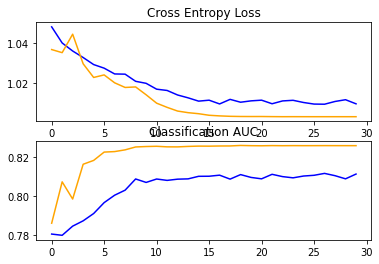

In [ ]:
summarize_diagnostics(history)

In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 49s 376ms/step - loss: 1.0106 - accuracy: 0.7828 - precision: 0.6238 - recall: 0.3302 - auc: 0.8108 - f1_score: 0.4331
Accuracy on training data: 0.7827599048614502% 
 Error on training data: 0.2172400951385498


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

40/40 [==============================] - 2s 46ms/step - loss: 1.0006 - accuracy: 0.7758 - precision: 0.5721 - recall: 0.4097 - auc: 0.8174 - f1_score: 0.4750
Accuracy on test data: 0.775801420211792% 
 Error on test data: 0.224198579788208


In [ ]:
'''
PK:
Train auc: 0.8108 vis-à-vis Test auc: 0.8174

It seems there is a little underfitting even though their accuracy tell the opposite.
However, for the datasets, the AUC metric is more important 
due to the imbalanced classes for train, validation, and test datasets.

'''

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
'''
Deﬁning  a  2  VGG  block  model + Data Augmentation.

'''

In [8]:
# define cnn model 
def define_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  
  model.add(Dense(4, activation='softmax')) 
  
  return model  

In [9]:
model = define_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [10]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [11]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [12]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5",
#                                                     save_best_only=True)

In [13]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     monitor='auc',
                                                     mode='auto',
                                                     restore_best_weights=True)

In [14]:
# compile model

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
history=model.fit(train_dataset,
                  validation_data=valid_dataset,
                  epochs = 30,
                  verbose = 1,
                  callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
129/129 [==============================] - 67s 518ms/step - loss: 1.0394 - accuracy: 0.7502 - precision: 0.5011 - recall: 0.2191 - auc: 0.7788 - f1_score: 0.2175 - val_loss: 1.0360 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr: 0.0100
Epoch 2/30
129/129 [==============================] - 51s 399ms/step - loss: 1.0384 - accuracy: 0.7474 - precision: 0.4887 - recall: 0.2216 - auc: 0.7752 - f1_score: 0.2236 - val_loss: 1.0347 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5004 - lr: 0.0063
Epoch 3/30
129/129 [==============================] - 53s 411ms/step - loss: 1.0376 - accuracy: 0.7507 - precision: 0.5025 - recall: 0.2984 - auc: 0.7791 - f1_score: 0.2999 - val_loss: 1.0344 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5007 - lr: 0.0040
Epoch 4/30
129/129 [==============================] - 53s 

In [19]:
# plot diagnostic learning curves 

def summarize_diagnostics(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='valid') 
  
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification AUC')
  plt.plot(history.history['auc'], color='blue', label='train')
  plt.plot(history.history['val_auc'], color='orange', label='valid') 
  
  # # save plot to file
  # filename = sys.argv[0].split('/')[-1] 
  # pyplot.savefig(filename + '_plot.png') 
  # pyplot.close()

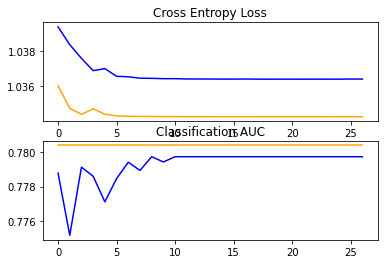

In [20]:
summarize_diagnostics(history)

In [21]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 48s 374ms/step - loss: 1.0364 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7797 - f1_score: 0.0000e+00
Accuracy on training data: 0.75% 
 Error on training data: 0.25


In [22]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

40/40 [==============================] - 2s 55ms/step - loss: 1.0331 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00
Accuracy on test data: 0.75% 
 Error on test data: 0.25


In [ ]:
'''
PK:
Train auc: 0.7797 vis-à-vis Test auc: 0.7806

It seems there is a little underfitting according to their AUCs even though their Accuracys are the same.

'''

In [59]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
'''
Deﬁning  a  3  VGG  block  model + Data Augmentation.

'''

In [60]:
# define cnn model 
def define_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  
  model.add(Dense(4, activation='softmax')) 
  
  return model  

In [38]:
model = define_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [61]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [62]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [63]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5",
#                                                     save_best_only=True)

In [64]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     monitor='auc',
                                                     mode='auto',
                                                     restore_best_weights=True)

In [65]:
# compile model

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [66]:
history=model.fit(train_dataset,
                  validation_data=valid_dataset,
                  epochs = 30,
                  verbose = 1,
                  callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
129/129 [==============================] - 55s 405ms/step - loss: 0.9495 - accuracy: 0.7837 - precision: 0.6031 - recall: 0.3946 - auc: 0.8264 - f1_score: 0.4762 - val_loss: 0.9476 - val_accuracy: 0.7884 - val_precision: 0.6113 - val_recall: 0.4213 - val_auc: 0.8402 - val_f1_score: 0.4981 - lr: 0.0100
Epoch 2/30
129/129 [==============================] - 52s 403ms/step - loss: 0.9331 - accuracy: 0.7890 - precision: 0.6202 - recall: 0.4024 - auc: 0.8329 - f1_score: 0.4867 - val_loss: 1.0751 - val_accuracy: 0.7813 - val_precision: 0.5782 - val_recall: 0.4624 - val_auc: 0.8299 - val_f1_score: 0.5126 - lr: 0.0063
Epoch 3/30
129/129 [==============================] - 52s 402ms/step - loss: 0.9108 - accuracy: 0.7897 - precision: 0.6265 - recall: 0.3934 - auc: 0.8395 - f1_score: 0.4786 - val_loss: 0.9368 - val_accuracy: 0.7964 - val_precision: 0.6863 - val_recall: 0.3421 - val_auc: 0.8203 - val_f1_score: 0.4534 - lr: 0.0040
Epoch 4/30
129/129 [==============================] - 52s 

In [67]:
# plot diagnostic learning curves 

def summarize_diagnostics(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='valid') 
  
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification AUC')
  plt.plot(history.history['auc'], color='blue', label='train')
  plt.plot(history.history['val_auc'], color='orange', label='valid') 
  
  # save plot to file
  # filename = sys.argv[0].split('/')[-1] 
  # pyplot.savefig(filename + '_plot.png') 
  # pyplot.close()

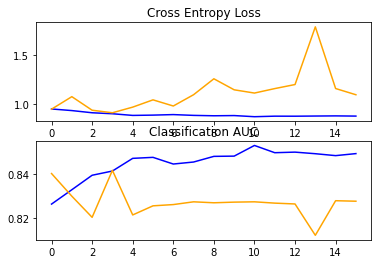

In [68]:
summarize_diagnostics(history)

In [69]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 48s 375ms/step - loss: 1.9299 - accuracy: 0.7537 - precision: 0.5080 - recall: 0.4675 - auc: 0.8063 - f1_score: 0.4870
Accuracy on training data: 0.7536603212356567% 
 Error on training data: 0.24633967876434326


In [70]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

40/40 [==============================] - 2s 50ms/step - loss: 1.2206 - accuracy: 0.7522 - precision: 0.5043 - recall: 0.5004 - auc: 0.8282 - f1_score: 0.5024
Accuracy on test data: 0.7521501183509827% 
 Error on test data: 0.24784988164901733


In [ ]:
'''
PK:
Train auc: 0.8063 vis-à-vis Test auc: 0.8282

It seems there is a little underfitting.

'''

In [71]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
'''
Evaluating a 3-block VGG model with Dropout Regularization + Data Augmentation.

'''

In [72]:
# define cnn model 

def define_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))

  model.add(Dense(4, activation='softmax'))

  return model

In [73]:
model = define_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [74]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [75]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [76]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5",
#                                                     save_best_only=True)

In [77]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     monitor='auc',
                                                     mode='auto',
                                                     restore_best_weights=True)

In [78]:
# compile model

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [79]:
history=model.fit(train_dataset,
                  validation_data=valid_dataset,
                  epochs = 30,
                  verbose = 1,
                  callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
129/129 [==============================] - 54s 410ms/step - loss: 1.4965 - accuracy: 0.7457 - precision: 0.4777 - recall: 0.1857 - auc: 0.7557 - f1_score: 0.2163 - val_loss: 1.0434 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5006 - lr: 0.0100
Epoch 2/30
129/129 [==============================] - 51s 396ms/step - loss: 1.0462 - accuracy: 0.7473 - precision: 0.4848 - recall: 0.1715 - auc: 0.7780 - f1_score: 0.2014 - val_loss: 1.0361 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7825 - val_f1_score: 0.5005 - lr: 0.0063
Epoch 3/30
129/129 [==============================] - 53s 409ms/step - loss: 1.0450 - accuracy: 0.7511 - precision: 0.5050 - recall: 0.2204 - auc: 0.7779 - f1_score: 0.2599 - val_loss: 1.0362 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr: 0.0040
Epoch 4/30
129/129 [==============================] - 51s 

In [80]:
# plot diagnostic learning curves 

def summarize_diagnostics(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='valid') 
  
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification AUC')
  plt.plot(history.history['auc'], color='blue', label='train')
  plt.plot(history.history['val_auc'], color='orange', label='valid') 
  
  # save plot to file
  # filename = sys.argv[0].split('/')[-1] 
  # pyplot.savefig(filename + '_plot.png') 
  # pyplot.close()

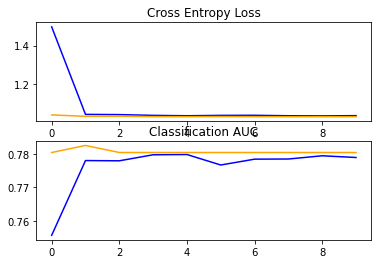

In [81]:
summarize_diagnostics(history)

In [82]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 48s 372ms/step - loss: 1.0365 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7797 - f1_score: 0.0000e+00
Accuracy on training data: 0.75% 
 Error on training data: 0.25


In [83]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

40/40 [==============================] - 2s 53ms/step - loss: 1.0330 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00
Accuracy on test data: 0.75% 
 Error on test data: 0.25


In [ ]:
'''
PK:
Train auc: 0.7797 vis-à-vis Test auc: 0.7806

It seems there is a little underfitting.

'''

In [84]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
'''
Evaluating a 3-block VGG model with increasing Dropout + Data Augmentation + Batch Normalization.

'''

In [85]:
# define cnn model 

def define_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization()) 
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())

  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(4, activation='softmax')) 

  return model

In [86]:
model = define_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                        

In [87]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [88]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [89]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5",
#                                                     save_best_only=True)

In [90]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     monitor='auc',
                                                     mode='auto',
                                                     restore_best_weights=True)

In [91]:
# compile model

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [94]:
history=model.fit(train_dataset,
                  validation_data=valid_dataset,
                  epochs = 30,
                  verbose = 1,
                  callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
129/129 [==============================] - 74s 565ms/step - loss: 0.9879 - accuracy: 0.7729 - precision: 0.5653 - recall: 0.3960 - auc: 0.8158 - f1_score: 0.4611 - val_loss: 8.4465 - val_accuracy: 0.6290 - val_precision: 0.2508 - val_recall: 0.2434 - val_auc: 0.5533 - val_f1_score: 0.2470 - lr: 0.0100
Epoch 2/30
129/129 [==============================] - 56s 432ms/step - loss: 0.9483 - accuracy: 0.7868 - precision: 0.6042 - recall: 0.4265 - auc: 0.8299 - f1_score: 0.4993 - val_loss: 2.3352 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7936 - val_f1_score: 0.5004 - lr: 0.0063
Epoch 3/30
129/129 [==============================] - 53s 409ms/step - loss: 0.9349 - accuracy: 0.7906 - precision: 0.6200 - recall: 0.4197 - auc: 0.8325 - f1_score: 0.4953 - val_loss: 0.9565 - val_accuracy: 0.7845 - val_precision: 0.6051 - val_recall: 0.3969 - val_auc: 0.8333 - val_f1_score: 0.4781 - lr: 0.0040
Epoch 4/30
129/129 [==============================] - 52s 

In [96]:
# plot diagnostic learning curves 

def summarize_diagnostics(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='valid') 
  
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification AUC')
  plt.plot(history.history['auc'], color='blue', label='train')
  plt.plot(history.history['val_auc'], color='orange', label='valid') 
  
  # save plot to file
  # filename = sys.argv[0].split('/')[-1] 
  # pyplot.savefig(filename + '_plot.png') 
  # pyplot.close()

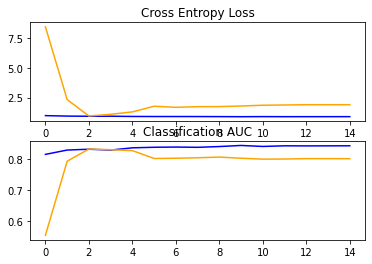

In [97]:
summarize_diagnostics(history)

In [99]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 48s 375ms/step - loss: 43.0156 - accuracy: 0.7050 - precision: 0.4100 - recall: 0.4095 - auc: 0.7092 - f1_score: 0.4067
Accuracy on training data: 0.7050390243530273% 
 Error on training data: 0.29496097564697266


In [98]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

40/40 [==============================] - 2s 51ms/step - loss: 2.3055 - accuracy: 0.7482 - precision: 0.4965 - recall: 0.4965 - auc: 0.7900 - f1_score: 0.4966
Accuracy on test data: 0.7482408285140991% 
 Error on test data: 0.2517591714859009


In [ ]:
'''
PK:
Train auc: 0.7092 vis-à-vis Test auc: 0.7900

It seems there is a little underfitting.

'''

In [ ]:
'''
VGG11 using VGG Blocks

'''

In [ ]:
# Example of creating a CNN model with many VGG blocks
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
#from keras.utils import plot_model    # ImportError: cannot import name 'plot_model' from 'keras.utils'
from keras.utils.vis_utils import plot_model

In [ ]:
# function for creating a vgg block
def vgg_block(layer_in, n_filters, n_conv): 
  # add convolutional layers
  for _ in range(n_conv):
    layer_in = Conv2D(n_filters, (3,3), padding = 'same', activation = 'relu')(layer_in) 
    # Use either (layer_in) or Sequential() without it
  
  # add max pooling layer
  layer_in = MaxPooling2D((2,2), strides = (2, 2))(layer_in) 

  return layer_in

In [ ]:
# define model input
visible = Input(shape = (224, 224, 3))

# add vgg module
layer = vgg_block(visible, 64, 2)

# add vgg module
layer = vgg_block(layer, 128, 2)

# add vgg module
layer = vgg_block(layer, 256, 4)

# create model
#model = Model(inputs=visible, outputs=layer)

In [ ]:
# summarize model
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 128)     147584    
                                                           

In [ ]:
! pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


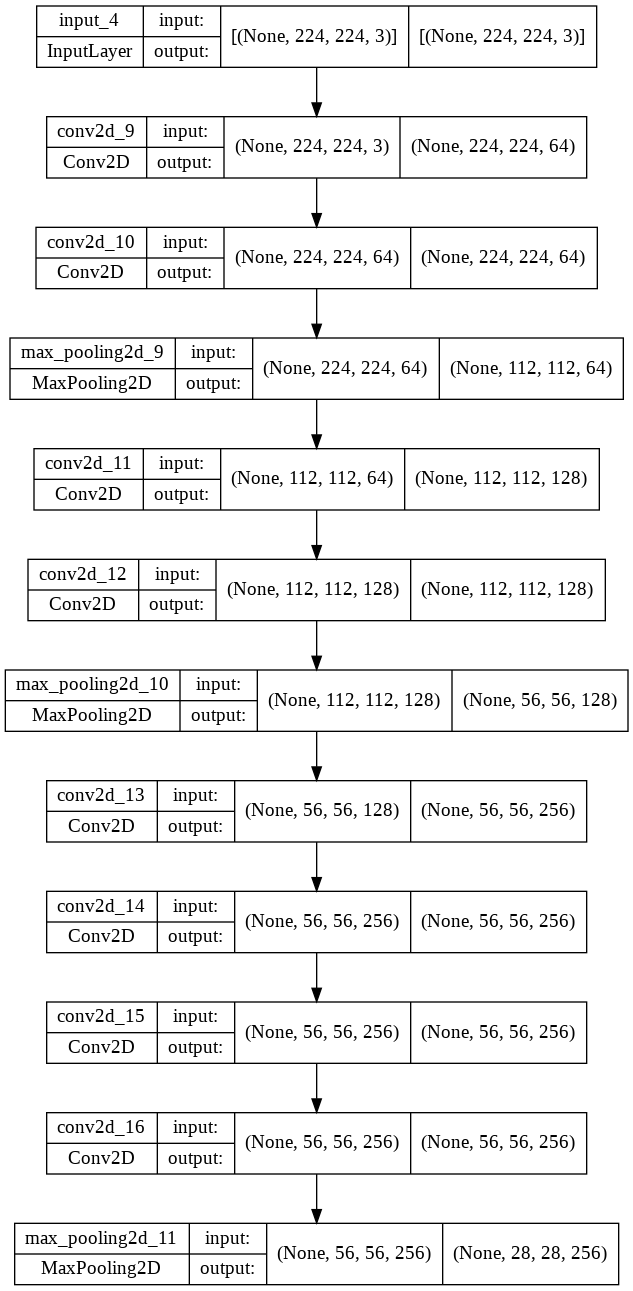

In [ ]:
# plot model architecture
plot_model(model, show_shapes=True, to_file = 'multiple_vgg_blocks.png')

In [ ]:
layer = tf.keras.layers.Flatten()(layer)

layer = tf.keras.layers.Dense(units = 512, activation = "relu")(layer)
layer = tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(units = 512, activation = "relu")(layer)
layer = tf.keras.layers.Dropout(0.5)(layer)

layer = tf.keras.layers.Dense(units = 4, activation = "softmax")(layer)

# create model
model = Model(inputs = visible, outputs = layer)   

In [ ]:
# summarize model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                           

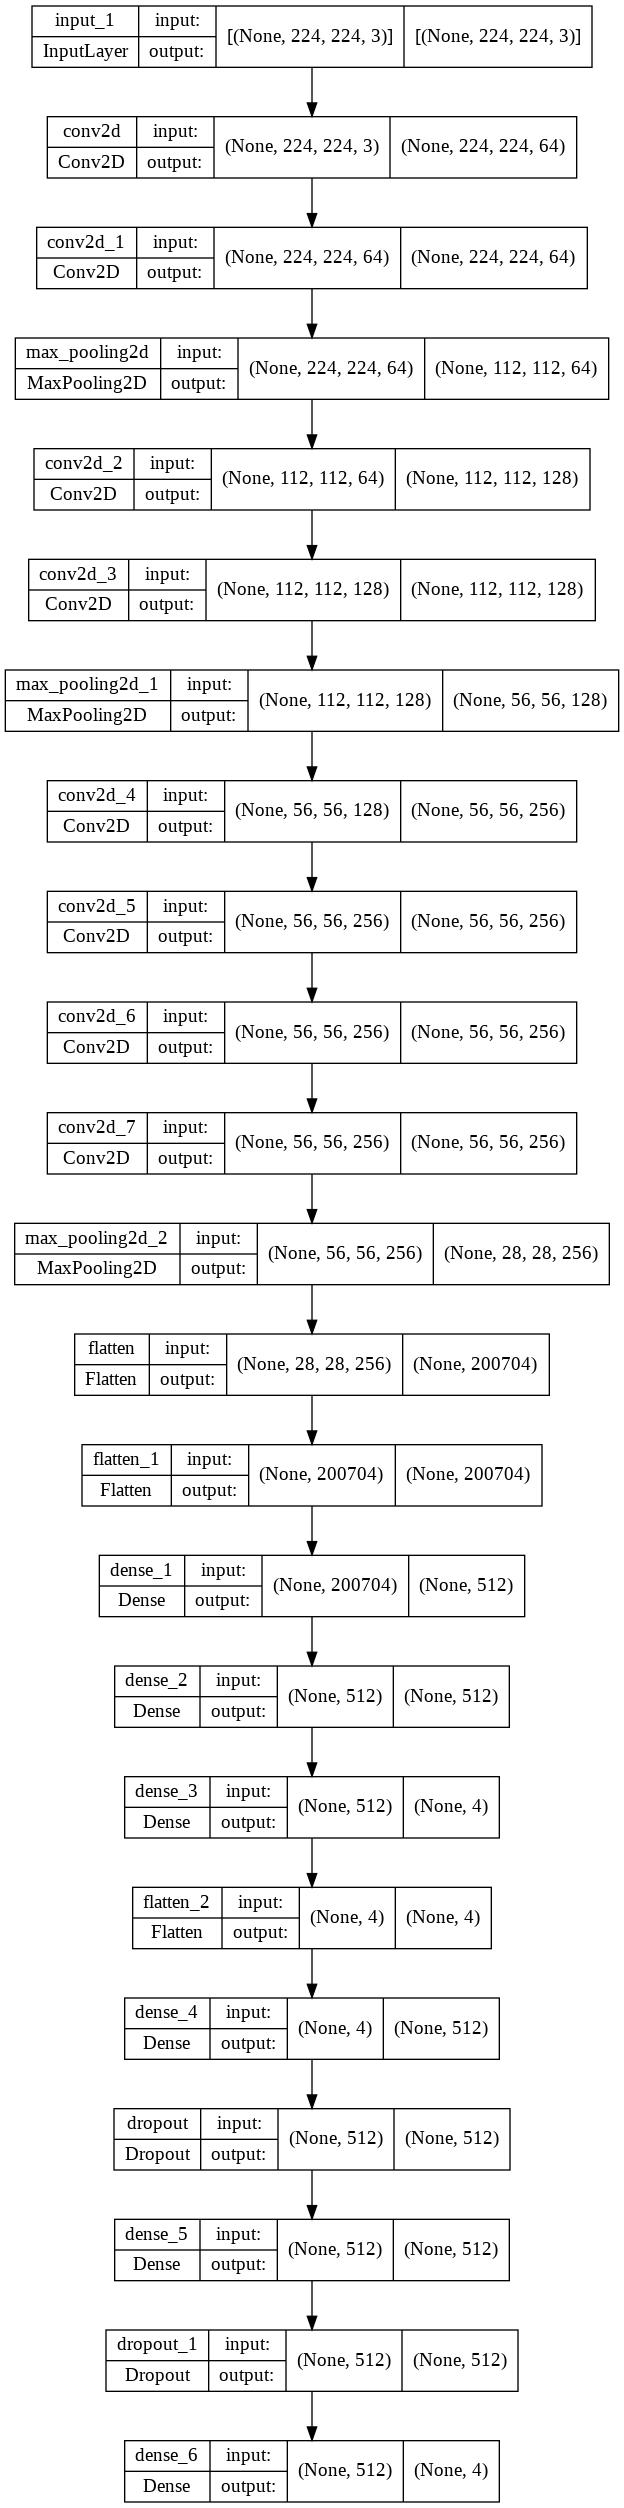

In [ ]:
# plot model architecture
plot_model(model, show_shapes=True, to_file = 'multiple_vgg_blocks.png')

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model20.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     #patience = 3,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log20')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    amsgrad = False,
    name = 'Adam',), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
%time


history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    batch_size = 32,
                    epochs = 100,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epoch 1/100
129/129 [==============================] - 77s 484ms/step - loss: 1.0724 - accuracy: 0.7501 - precision: 0.5005 - recall: 0.2282 - auc: 0.7738 - f1_score: 0.2761 - val_loss: 1.0445 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_score: 0.0000e+00 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 56s 429ms/step - loss: 1.0447 - accuracy: 0.7504 - precision: 0.5016 - recall: 0.2308 - auc: 0.7778 - f1_score: 0.2921 - val_loss: 1.0450 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_score: 0.0000e+00 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 58s 449ms/step - loss: 1.0419 - accuracy: 0.7502 - precision: 0.5012 - recall: 0.2018 - auc: 0.7793 - f1_score: 0.2617 - val_loss: 1.0348 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - v

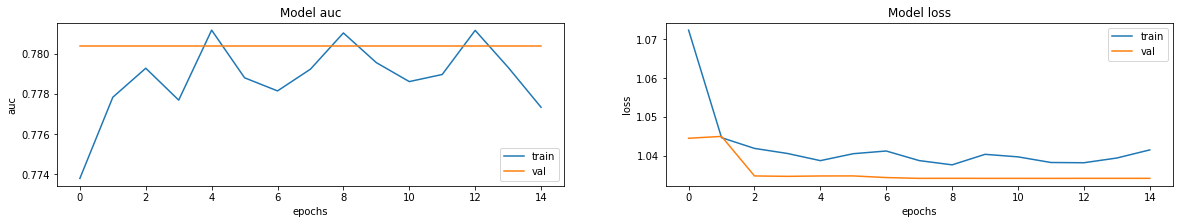

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# This shows underfitting.

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

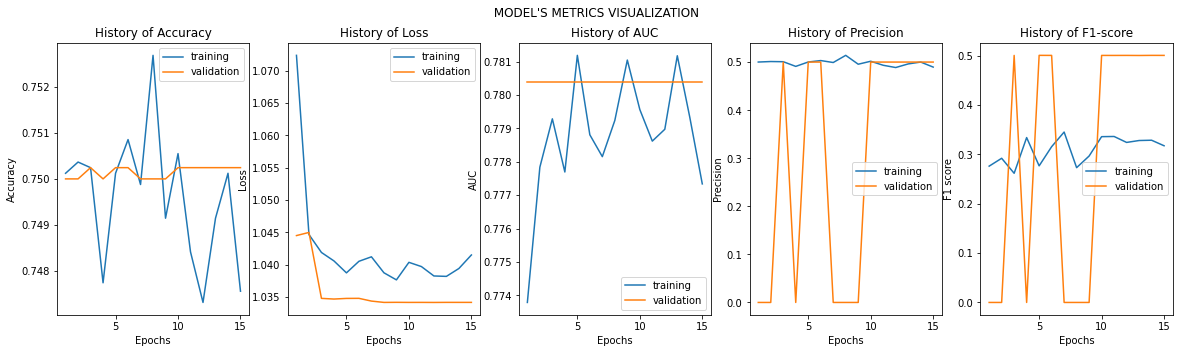

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.7501954436302185
Precision =  0.5003909468650818
Recall =  0.5003909468650818
AUC =  0.7805577516555786
F1_score =  0.5004788041114807


In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y = history.history['loss'], name = 'Train'))
fig.add_trace(go.Scattergl(y = history.history['val_loss'], name = 'Valid'))
fig.update_layout(height = 500, width = 700, xaxis_title = 'Epoch', yaxis_title = 'Loss')
fig.show()

In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 46s 351ms/step - loss: 1.0370 - accuracy: 0.7499 - precision: 0.4998 - recall: 0.4998 - auc: 0.7797 - f1_score: 0.4961
Accuracy on training data: 0.7498779892921448% 
 Error on training data: 0.2501220107078552


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 3s 84ms/step - loss: 1.0336 - accuracy: 0.7502 - precision: 0.5004 - recall: 0.5004 - auc: 0.7806 - f1_score: 0.5004
Accuracy on test data: 0.7501954436302185% 
 Error on test data: 0.2498045563697815


In [ ]:
'''
PK:
Train auc: 0.7797 vis-à-vis Test auc: 0.7806

It seems there is a little underfitting.

It looks good to me since generalizarion error is almost zero.

'''

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log20

In [ ]:
#model.save("alzheimer_model20.h5")

In [ ]:
#model.save("log20")

INFO:tensorflow:Assets written to: log20/assets


In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
'''
Model Test 13
Inception Module

'''

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model

In [ ]:
# function for creating a projected inception module

def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
  # 1x1 conv
  conv1 = Conv2D(f1, (1, 1), padding = 'same', activation = 'relu')(layer_in) 
  
  # 3x3 conv
  conv3 = Conv2D(f2_in, (1, 1), padding = 'same', activation = 'relu')(layer_in) 
  conv3 = Conv2D(f2_out, (3, 3), padding = 'same', activation = 'relu')(conv3) 
  
  # 5x5 conv
  conv5 = Conv2D(f3_in, (1, 1), padding = 'same', activation = 'relu')(layer_in) 
  conv5 = Conv2D(f3_out, (5, 5), padding = 'same', activation = 'relu')(conv5) 
  
  # 3x3 max pooling
  pool = MaxPooling2D((3, 3), strides =(1, 1), padding = 'same')(layer_in) 
  pool = Conv2D(f4_out, (1, 1), padding = 'same', activation = 'relu')(pool) 
  
  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis = -1) 
  
  return layer_out

In [ ]:
# define model input
visible = Input(shape = (224, 224, 3))

# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)

# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)

# create model
#model = Model(inputs = visible, outputs = layer)

In [ ]:
# summarize model
#model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_25 (Conv2D)             (None, 224, 224, 96  384         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_27 (Conv2D)             (None, 224, 224, 16  64          ['input_3[0][0]']                
                                )                                                             

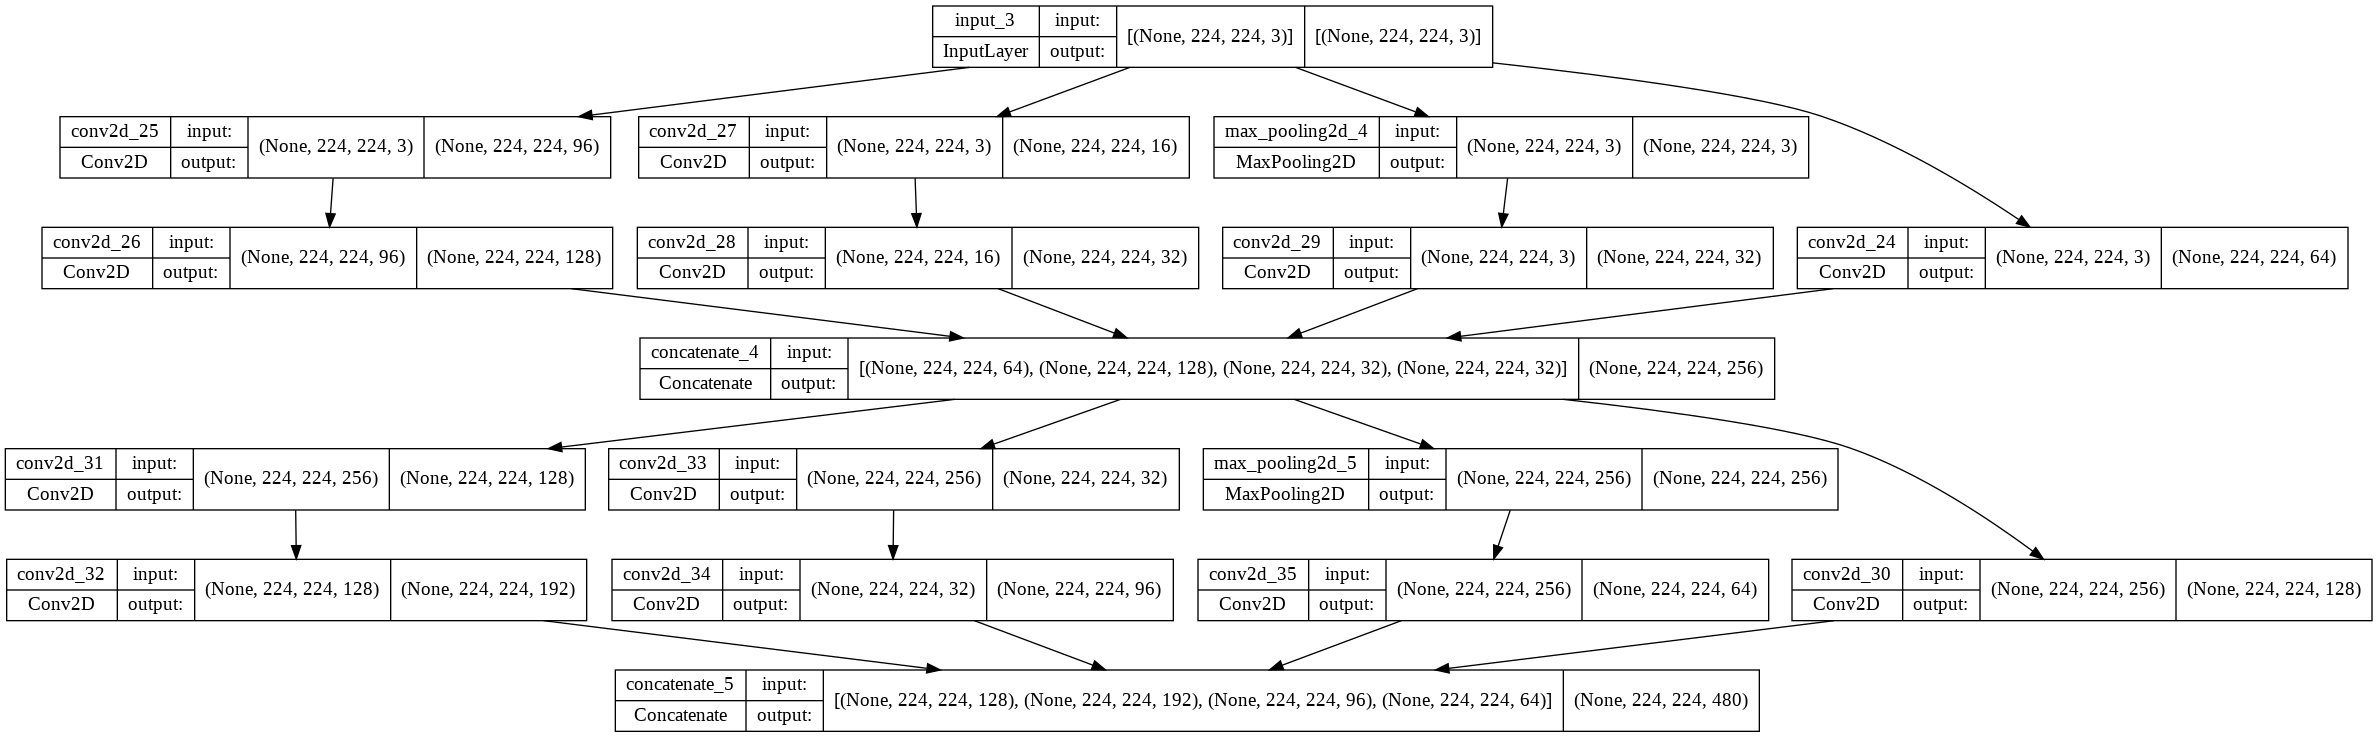

In [ ]:
# plot model architecture
#plot_model(model, show_shapes=True, to_file = 'inception_module1.png')

In [ ]:
layer = tf.keras.layers.Flatten()(layer)

layer = tf.keras.layers.Dense(units = 64, activation = "relu")(layer)
layer = tf.keras.layers.Dropout(0.5)(layer)
layer = tf.keras.layers.Dense(units = 32, activation = "relu")(layer)
layer = tf.keras.layers.Dropout(0.5)(layer)

layer = tf.keras.layers.Dense(units = 4, activation = "softmax")(layer)

# create model
model = Model(inputs = visible, outputs = layer)   

ResourceExhaustedError: ignored

In [ ]:
'''
PK:
I can't ude this module due to ResourceExhaustedError.  

'''

In [ ]:
'''
Model Test 14
Residual Module

'''

In [ ]:
# example of a CNN model with an identity or projection residual module
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import add
from keras.utils.vis_utils import plot_model

In [ ]:
# function for creating an identity or projection residual module 

def residual_module(layer_in, n_filters):
  merge_input = layer_in
  # check if the number of filters needs to be increase, assumes channels last format 
  if layer_in.shape[-1] != n_filters:
    merge_input = Conv2D(n_filters, (1, 1), padding = 'same', activation = 'relu', 
                        kernel_initializer = 'he_normal')(layer_in)
  
  # conv1
  conv1 = Conv2D(n_filters, (3, 3), padding = 'same', activation = 'relu', 
                kernel_initializer = 'he_normal')(layer_in)
  
  # conv2
  conv2 = Conv2D(n_filters, (3, 3), padding = 'same', activation = 'linear', 
                kernel_initializer = 'he_normal')(conv1)       
  
  # add filters, assumes filters/channels last
  layer_out = add([conv2, merge_input])
  
  # activation function
  layer_out = Activation('relu')(layer_out) 

  return layer_out

In [ ]:
# define model input
visible = Input(shape=(224, 224, 3))

# add vgg module
layer = residual_module(visible, 32)

# create model
#model = Model(inputs=visible, outputs=layer)

In [ ]:
# summarize model
#model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_49 (Conv2D)             (None, 224, 224, 64  1792        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_50 (Conv2D)             (None, 224, 224, 64  36928       ['conv2d_49[0][0]']              
                                )                                                           

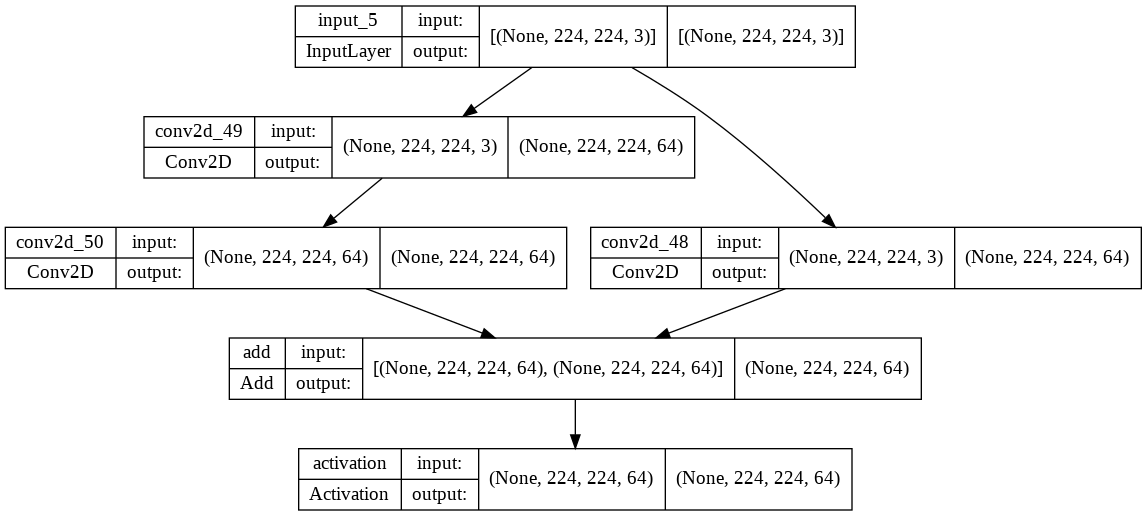

In [ ]:
# plot model architecture
#plot_model(model, show_shapes=True, to_file = 'residual_module.png')

In [ ]:
# layer = tf.keras.layers.Flatten()(layer)

# layer = tf.keras.layers.Dense(units = 1024, activation = "relu")(layer)
# layer = tf.keras.layers.Dropout(0.5)(layer)
# layer = tf.keras.layers.Dense(units = 512, activation = "relu")(layer)
# layer = tf.keras.layers.Dropout(0.5)(layer)

# layer = tf.keras.layers.Dense(units = 4, activation = "softmax")(layer)

# # create model
# model = Model(inputs = visible, outputs = layer)   

In [ ]:
# summarize model
# model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 224, 224, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_14 (Conv2D)             (None, 224, 224, 64  36928       ['conv2d_13[0][0]']              
                                )                                                           

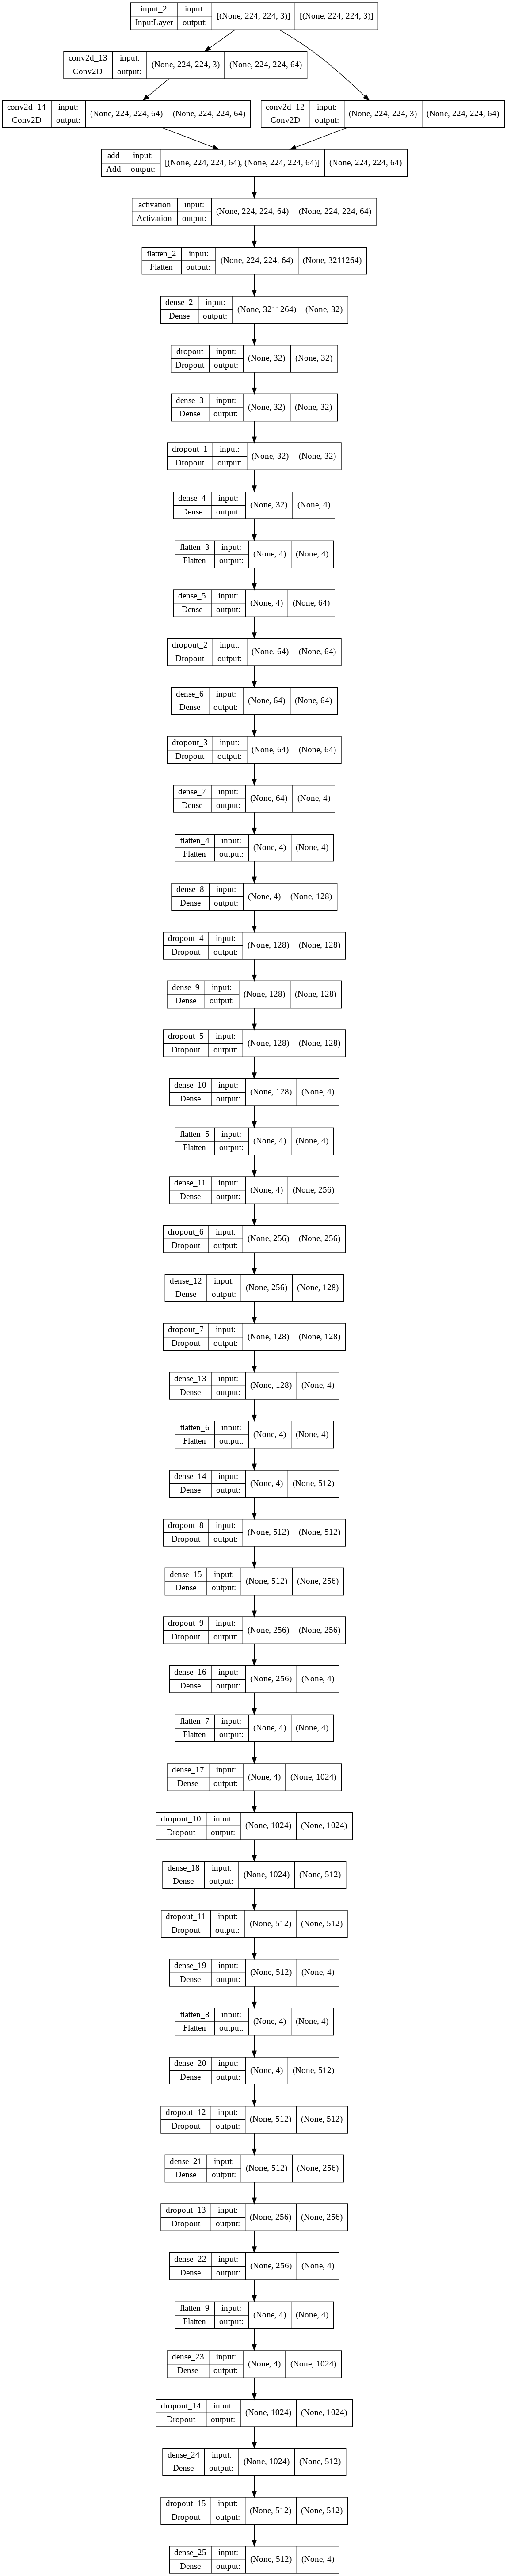

In [ ]:
# # plot model architecture
# plot_model(model, show_shapes=True, to_file = 'inception_module2.png')

In [ ]:
layer = tf.keras.layers.Flatten()(layer)

layer = tf.keras.layers.Dense(units = 32, activation = "relu")(layer)
layer = tf.keras.layers.Dense(units = 16, activation = "relu")(layer)

layer = tf.keras.layers.Dense(units = 4, activation = "softmax")(layer)

# create model
model = Model(inputs = visible, outputs = layer)   

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 224, 224, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_5 (Conv2D)              (None, 224, 224, 32  9248        ['conv2d_4[0][0]']               
                                )                                                           

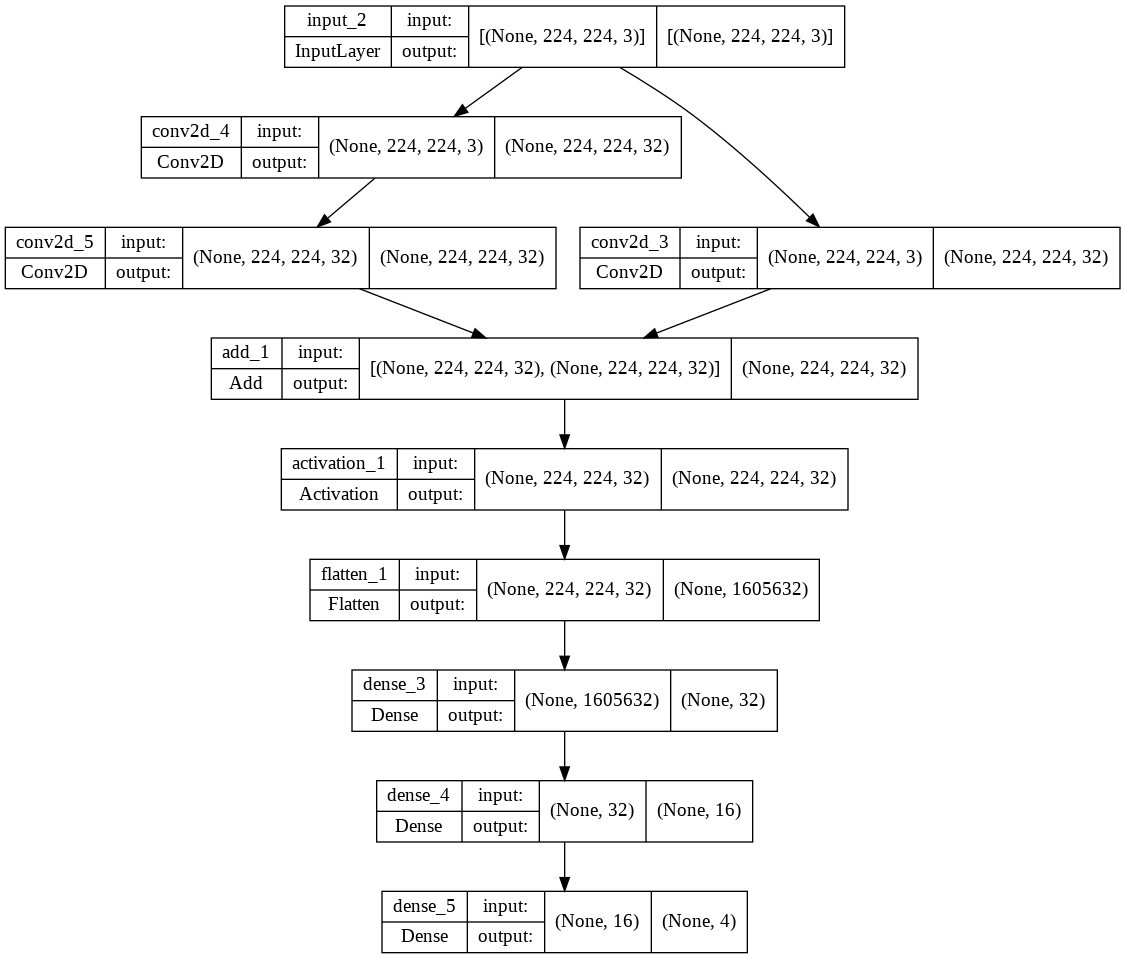

In [ ]:
# plot model architecture
plot_model(model, show_shapes=True, to_file = 'inception_module3.png')

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model21.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     #patience = 3,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log21')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    amsgrad = False,
    name = 'Adam',), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
%time


history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    batch_size = 32,
                    epochs = 100,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Epoch 1/100
129/129 [==============================] - 55s 413ms/step - loss: 23.0193 - accuracy: 0.7506 - precision: 0.5027 - recall: 0.2238 - auc: 0.7586 - f1_score: 0.2225 - val_loss: 1.0346 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 53s 409ms/step - loss: 1.0374 - accuracy: 0.7489 - precision: 0.4878 - recall: 0.0876 - auc: 0.7783 - f1_score: 0.0870 - val_loss: 1.0342 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 51s 393ms/step - loss: 1.0370 - accuracy: 0.7499 - precision: 0.4997 - recall: 0.4646 - auc: 0.7781 - f1_score: 0.4685 - val_loss: 1.0343 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_score: 0.

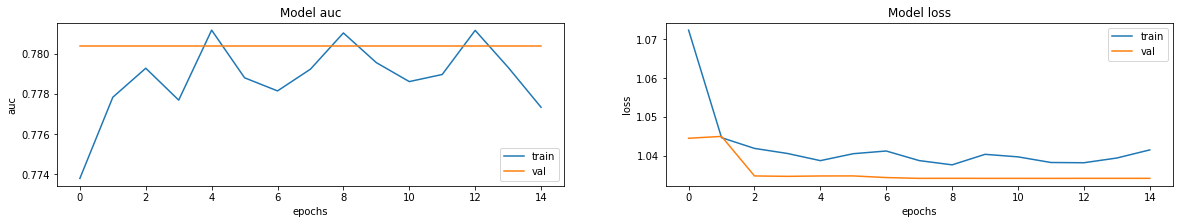

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# This shows underfitting.

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

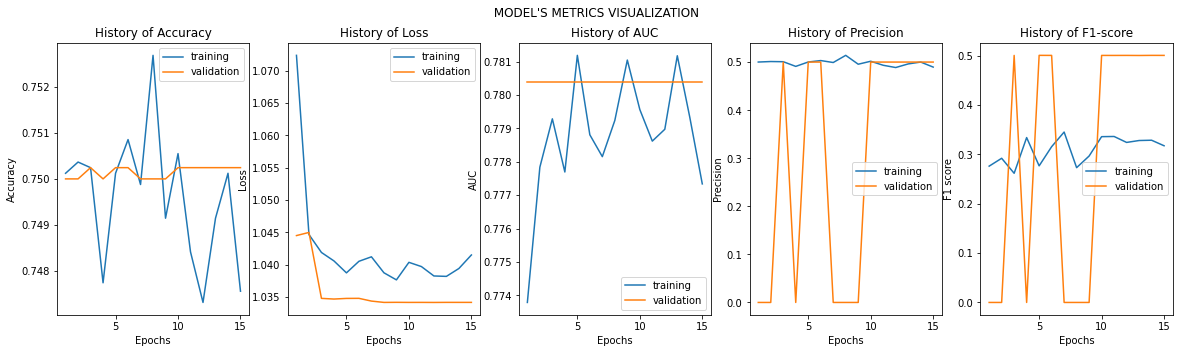

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.7501954436302185
Precision =  0.5003909468650818
Recall =  0.5003909468650818
AUC =  0.7805577516555786
F1_score =  0.5004788041114807


In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 46s 351ms/step - loss: 1.0370 - accuracy: 0.7499 - precision: 0.4998 - recall: 0.4998 - auc: 0.7797 - f1_score: 0.4961
Accuracy on training data: 0.7498779892921448% 
 Error on training data: 0.2501220107078552


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 3s 84ms/step - loss: 1.0336 - accuracy: 0.7502 - precision: 0.5004 - recall: 0.5004 - auc: 0.7806 - f1_score: 0.5004
Accuracy on test data: 0.7501954436302185% 
 Error on test data: 0.2498045563697815


In [ ]:
'''
PK:

Train auc: 0.7797 vis-à-vis Test auc: 0.7806.

There is a little underfitting.

'''

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log20

In [ ]:
#model.save("alzheimer_model20.h5")

In [ ]:
#model.save("log20")

INFO:tensorflow:Assets written to: log20/assets


In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# 4. Modified ResNet-34 CNN using Keras

In [ ]:
from functools import partial

DefaultConv2D = partial(Conv2D, kernel_size = 3, strides = 1,
                        padding = 'same', use_bias = False)

In [ ]:
#class ResidualUnit(Layer):

class ResidualUnit(tf.keras.layers.Layer):  
  
    def __init__(self, filters, strides = 1, activation = "relu", **kwargs): 
        super().__init__(**kwargs)

        self.filters = filters   # PK added
        self.strides = strides   # PK

        self.activation = activations.get(activation) 
        self.main_layers = [
            DefaultConv2D(filters, strides = strides), 
            BatchNormalization(),
            self.activation, 
            DefaultConv2D(filters),
            BatchNormalization()] 
        
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size = 1, strides = strides), 
                BatchNormalization()]
            
    def call(self, inputs): 
        Z = inputs
        for layer in self.main_layers: 
            Z = layer(Z)
        skip_Z = inputs
        
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        
        return self.activation(Z + skip_Z)

    def get_config(self):                     
        config = super().get_config().copy()  # PK
        config.update({
                      "filters": self.filters,  # PK
                      "strides": self.strides,  # PK
                      "activation": self.activation   # PK
                     })

        return config        

In [ ]:
model = Sequential()

model.add(DefaultConv2D(64, kernel_size = 5, strides = 2, input_shape=[224, 224, 3]))   
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 3, strides = 2, padding = 'same')) 

prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3: 
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides = strides)) 
    prev_filters = filters

model.add(GlobalAvgPool2D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))

In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      4800      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 residual_unit (ResidualUnit  (None, 56, 56, 64)       74240     
 )                                                               
                                                        

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model12.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log12')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    amsgrad = False,
    name = 'Adam',), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
# %time


EPOCHS = 100

history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    #batch_size = 32,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
Epoch 1/100
129/129 [==============================] - 71s 426ms/step - loss: 1.4498 - accuracy: 0.7503 - precision: 0.5012 - recall: 0.2606 - auc: 0.7607 - f1_score: 0.3083 - val_loss: 6689.9482 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.6670 - val_f1_score: 0.5004 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 54s 417ms/step - loss: 1.1256 - accuracy: 0.7512 - precision: 0.5053 - recall: 0.2199 - auc: 0.7676 - f1_score: 0.2880 - val_loss: 22.4262 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.6777 - val_f1_score: 0.5004 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 53s 414ms/step - loss: 1.0052 - accuracy: 0.7754 - precision: 0.6628 - recall: 0.2072 - auc: 0.7995 - f1_score: 0.3112 - val_loss: 4.5872 - val_accuracy: 0.7505 - val_precision: 0.5010 - val_recall: 0.4897 - val_auc: 0.7367 - val_f1_score: 0.4953 

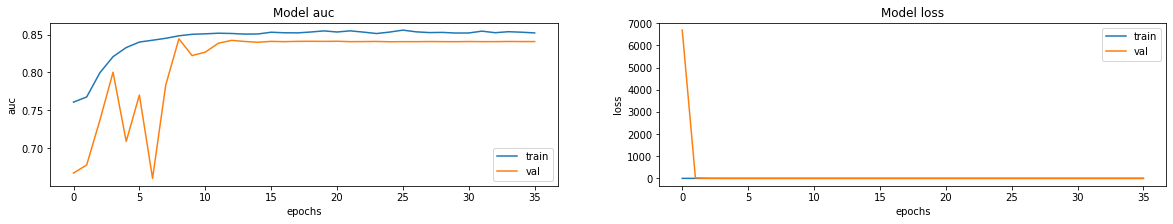

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# This shows overfitting.

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

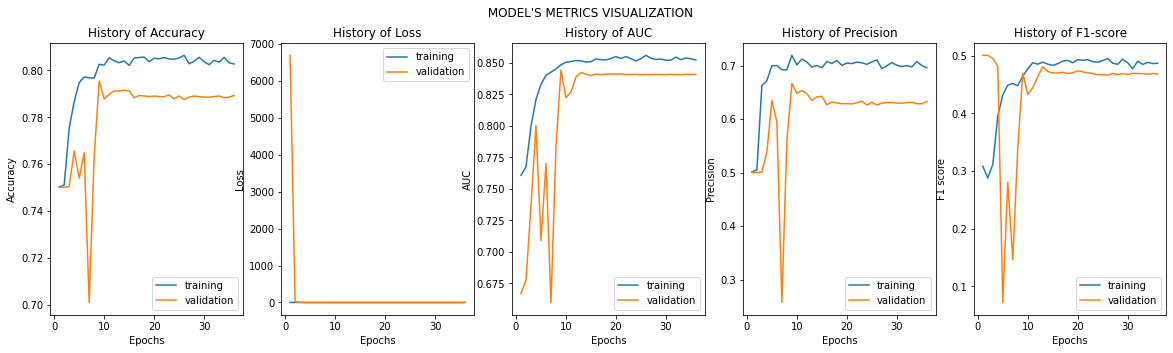

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.7906567454338074
Precision =  0.631313145160675
Recall =  0.3909304141998291
AUC =  0.8306716084480286
F1_score =  0.4816818833351135


In [ ]:
# scores1 = model.evaluate(train_dataset, verbose = 1)

# print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 46s 358ms/step - loss: 0.8548 - accuracy: 0.8088 - precision: 0.7135 - recall: 0.3931 - auc: 0.8574 - f1_score: 0.4998
Accuracy on training data: 0.8088091611862183% 
 Error on training data: 0.19119083881378174


In [ ]:
# scores2 = model.evaluate(test_dataset, verbose = 1)

# print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 3s 62ms/step - loss: 1.1219 - accuracy: 0.7907 - precision: 0.6313 - recall: 0.3909 - auc: 0.8307 - f1_score: 0.4790
Accuracy on test data: 0.7906567454338074% 
 Error on test data: 0.20934325456619263


In [ ]:
'''
PK:

Train auc: 0.8574 vis-à-vis Test auc: 0.8307.

There is much overfitting.

'''

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log12

In [ ]:
# model.save("alzheimer_model12.h5")

In [ ]:
# model.save("log12")

INFO:tensorflow:Assets written to: log12/assets


INFO:tensorflow:Assets written to: log12/assets


In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# 5. Final Test 4 - activation = 'selu' + kernel_initializer = 'lecun_normal' + optimizer = ‘Nadam’ +  
# regularizer = 'AlphaDropout'

# I would use this in case of having overfitting but I had underfitting so it is not necessary.

In [ ]:
IMAGE_SIZE = (224,224)

In [ ]:
def conv_block(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size = 2)
    ])
    
    return model

In [ ]:
def dense_block(units, dropout_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='selu', kernel_initializer = 'lecun_normal'),
        tf.keras.layers.AlphaDropout(dropout_rate)
    ])
    
    return model

In [ ]:
NUM_CLASSES = 4

def build_model():
    
    '''Sequential Model creation'''
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),

        tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
        tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = 2),
    
        conv_block(32),    
        conv_block(64),
        conv_block(128),
        conv_block(256),
            
        tf.keras.layers.Flatten(),
    
        dense_block(128, 0.5),
        dense_block(64, 0.5),
        dense_block(32, 0.5),
    
        tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
    ])
        
    return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 56, 56, 32)        2032      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 64)        7136      
                                                                 
 sequential_2 (Sequential)   (None, 14, 14, 128)       26560     
                                                      

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# 6. elu + he_normal + Adam + Dropout

In [ ]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        #tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')
        tf.keras.layers.MaxPool2D(pool_size = 2)
    ]
    )
    
    return block

In [ ]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation = 'elu', kernel_initializer = 'he_normal'),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [ ]:
NUM_CLASSES = 4

def build_model():
    
    '''Sequential Model creation'''
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(224, 224, 3)),

        tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
        tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
        #tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'same'),
        tf.keras.layers.MaxPooling2D(pool_size = 2),
    
        conv_block(32),    
        conv_block(64),
        conv_block(128),
        conv_block(256),
            
        tf.keras.layers.Flatten(),
    
        dense_block(128, 0.2),
        dense_block(64, 0.2),
        dense_block(32, 0.2),
    
        tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
    ])
        
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 sequential_8 (Sequential)   (None, 56, 56, 32)        2032      
                                                                 
 sequential_9 (Sequential)   (None, 28, 28, 64)        7136      
                                                                 
 sequential_10 (Sequential)  (None, 14, 14, 128)       26560     
                                                     

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model16.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     #patience = 3,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log16')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    amsgrad = False,
    name = 'Adam',), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
%time


EPOCHS = 100

history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    #batch_size = 32,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Epoch 1/100
129/129 [==============================] - 53s 396ms/step - loss: 1.0536 - accuracy: 0.7493 - precision: 0.4969 - recall: 0.2360 - auc: 0.7768 - f1_score: 0.2684 - val_loss: 1.0375 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 50s 391ms/step - loss: 1.0435 - accuracy: 0.7493 - precision: 0.4969 - recall: 0.2145 - auc: 0.7786 - f1_score: 0.2559 - val_loss: 1.0373 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 50s 384ms/step - loss: 1.0398 - accuracy: 0.7500 - precision: 0.5000 - recall: 0.2101 - auc: 0.7794 - f1_score: 0.2668 - val_loss: 1.0342 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr

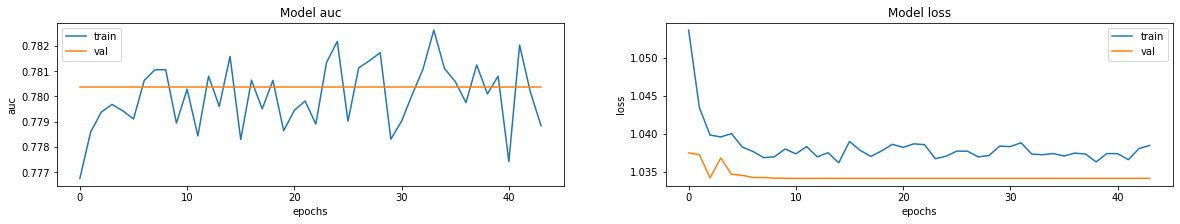

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# Model AUC plots are very noisy.

# Model loss shows underfitting.

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

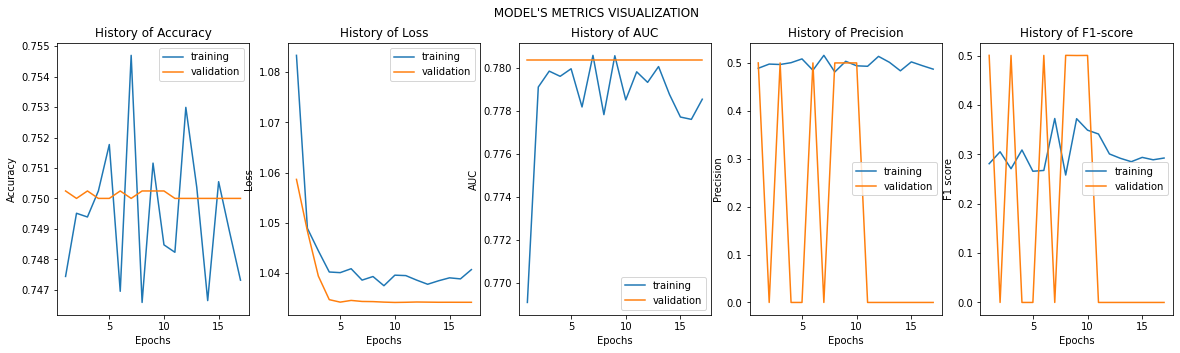

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.75
Precision =  0.0
Recall =  0.0
AUC =  0.7805577516555786
F1_score =  0.0


In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 42s 326ms/step - loss: 1.0364 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7797 - f1_score: 0.0000e+00
Accuracy on training data: 0.75% 
 Error on training data: 0.25


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 2s 46ms/step - loss: 1.0329 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00
Accuracy on test data: 0.75% 
 Error on test data: 0.25


In [ ]:
'''
PK:

Train auc: 0.7797 vis-à-vis Test auc: 0.7806.

There is a little underfitting.

'''

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log16

In [ ]:
# model.save("alzheimer_model12.h5")

In [ ]:
# model.save("log16")

INFO:tensorflow:Assets written to: log12/assets


INFO:tensorflow:Assets written to: log12/assets


In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# 7. activation = 'selu' + kernel_initializer = 'lecun_normal' + optimizer = 'Nadam', My choice. 

In [ ]:
def conv_block(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size = 2)
    ])
    
    return model

In [ ]:
def dense_block(units):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='selu', kernel_initializer = 'lecun_normal')])
    
    return model

In [ ]:
NUM_CLASSES = 4

def build_model():
    
    '''Sequential Model creation'''
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),

        tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
        tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = 2),
    
        conv_block(32),    
        conv_block(64),
        conv_block(128),
        conv_block(256),
            
        tf.keras.layers.Flatten(),
    
        dense_block(128),
        dense_block(64),
        dense_block(32),
    
        tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
    ])
        
    return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 56, 56, 32)        2032      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 64)        7136      
                                                                 
 sequential_2 (Sequential)   (None, 14, 14, 128)       26560     
                                                      

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model15.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     #patience = 3,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log15')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Nadam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    #amsgrad=False,
    name = 'Nadam',), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
%time


EPOCHS = 100

history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    #batch_size = 32,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Epoch 1/100
129/129 [==============================] - 54s 390ms/step - loss: 1.0934 - accuracy: 0.7505 - precision: 0.5020 - recall: 0.2509 - auc: 0.7737 - f1_score: 0.2490 - val_loss: 1.0432 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5004 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 50s 387ms/step - loss: 1.0438 - accuracy: 0.7518 - precision: 0.5077 - recall: 0.2418 - auc: 0.7788 - f1_score: 0.2401 - val_loss: 1.0383 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 50s 389ms/step - loss: 1.0406 - accuracy: 0.7493 - precision: 0.4968 - recall: 0.2289 - auc: 0.7771 - f1_score: 0.2272 - val_loss: 1.0345 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5005 - lr

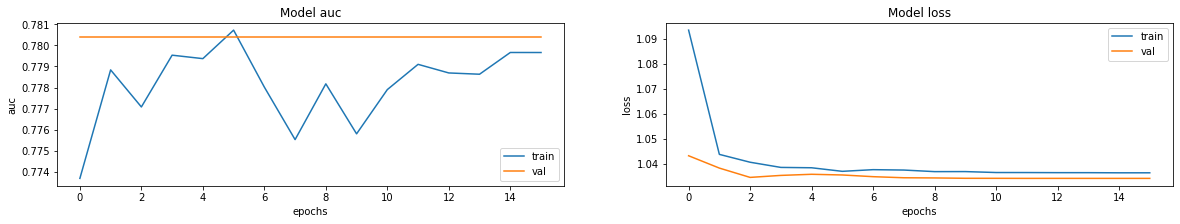

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# This shows underfitting.

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

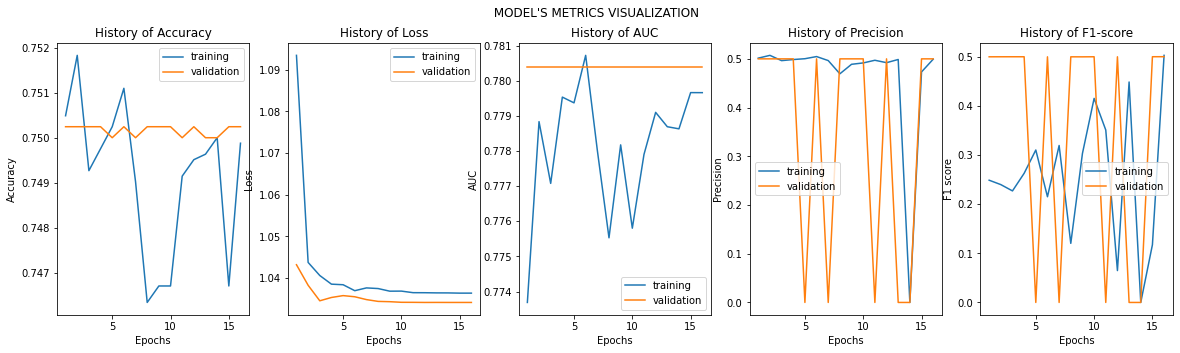

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.7501954436302185
Precision =  0.5003909468650818
Recall =  0.5003909468650818
AUC =  0.7805577516555786
F1_score =  0.5003780126571655


In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 42s 325ms/step - loss: 1.0378 - accuracy: 0.7499 - precision: 0.4998 - recall: 0.4998 - auc: 0.7797 - f1_score: 0.4961
Accuracy on training data: 0.7498779892921448% 
 Error on training data: 0.2501220107078552


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 2s 45ms/step - loss: 1.0343 - accuracy: 0.7502 - precision: 0.5004 - recall: 0.5004 - auc: 0.7806 - f1_score: 0.5004
Accuracy on test data: 0.7501954436302185% 
 Error on test data: 0.2498045563697815


In [ ]:
'''
PK:

Train auc: 0.7797 vis-à-vis Test auc: 0.7806.

There is a little underfitting.

'''

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log12

In [ ]:
model.save("alzheimer_model15.h5")

In [ ]:
model.save("log15")

INFO:tensorflow:Assets written to: log15/assets


In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# 8. selu + L1 + BN + Nadam + lecun_normal

In [ ]:
def conv_block(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')
    ]
    )
    
    return model       

In [ ]:
def dense_block(units):
    model = tf.keras.Sequential([
        #tf.keras.layers.Dense(units, kernel_initializer = 'he_normal', use_bias = False,
        tf.keras.layers.Dense(units, kernel_initializer = 'lecun_normal', use_bias = False,
                              
                              kernel_regularizer = regularizers.L1(0.01)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Activation('elu')
        tf.keras.layers.Activation('selu')
    ])
    
    return model

In [ ]:
NUM_CLASSES = 4

def build_model():
    
    '''Sequential Model creation'''
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, padding = 'same', input_shape = (224, 224, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    
        conv_block(32),    
        conv_block(64),
        conv_block(128),
        conv_block(256),
            
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
    
        dense_block(128),
        dense_block(64),
        dense_block(32),
    
        tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
    ])
        
    return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 sequential_4 (Sequential)   (None, 56, 56, 32)        2032      
                                                                 
 sequential_5 (Sequential)   (None, 28, 28, 64)        7136      
                                                                 
 sequential_6 (Sequential)   (None, 14, 14, 128)       26560     
                                                                 
 sequential_7 (Sequential)   (None, 7, 7, 256)         102272    
                                                     

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model17.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     #patience = 3,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log17')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Nadam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    #amsgrad=False,
    name = 'Nadam',), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
%time


EPOCHS = 100

history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    #batch_size = 32,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epoch 1/100
129/129 [==============================] - 73s 435ms/step - loss: 49.1578 - accuracy: 0.7448 - precision: 0.4695 - recall: 0.1618 - auc: 0.7684 - f1_score: 0.1616 - val_loss: 57.4491 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5006 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 56s 434ms/step - loss: 30.3356 - accuracy: 0.7478 - precision: 0.4894 - recall: 0.2028 - auc: 0.7786 - f1_score: 0.2013 - val_loss: 21.0550 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5004 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 55s 426ms/step - loss: 19.1226 - accuracy: 0.7485 - precision: 0.4933 - recall: 0.2157 - auc: 0.7773 - f1_score: 0.2141 - val_loss: 22.0016 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_scor

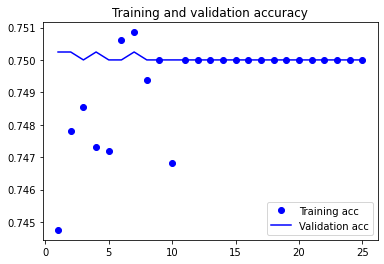

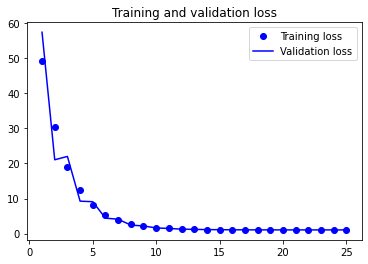

In [ ]:
# #import matplotlib.pyplot as plt 

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

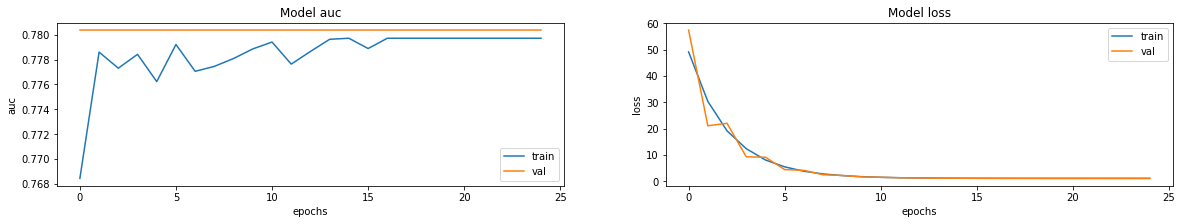

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# This shows underfitting.

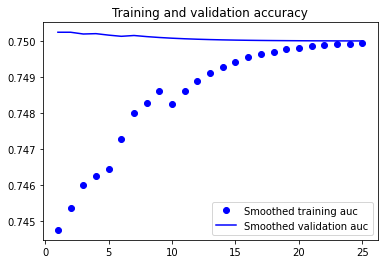

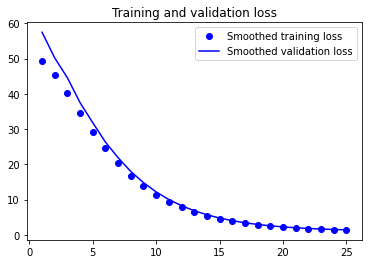

In [ ]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points: 
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor)) 
    else:
      smoothed_points.append(point) 
  
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training auc')

plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation auc')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')

plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
_ = model.evaluate(test_dataset)

40/40 [==============================] - 2s 49ms/step - loss: 1.0952 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00


In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

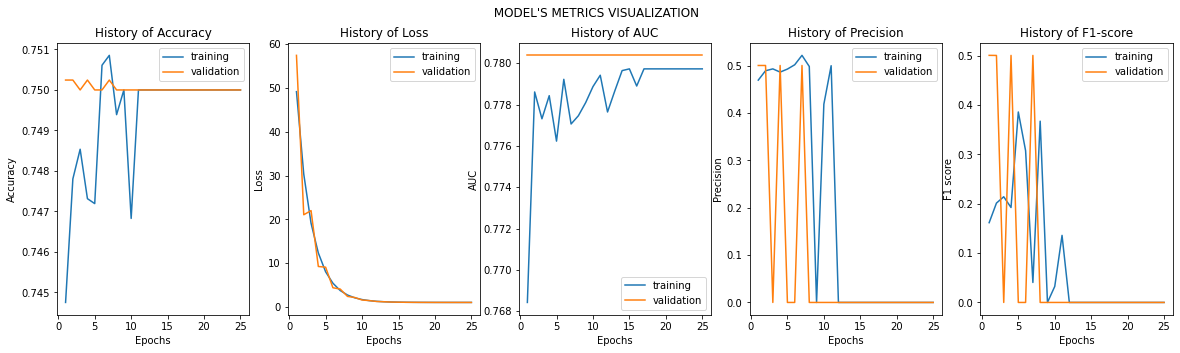

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.75
Precision =  0.0
Recall =  0.0
AUC =  0.7805577516555786
F1_score =  0.0


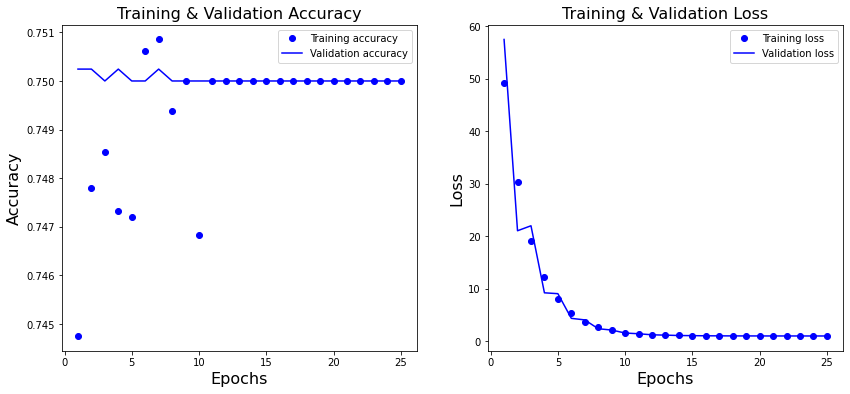

In [ ]:
#import matplotlib.pyplot as plt
  
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y = history.history['loss'], name = 'Train'))
fig.add_trace(go.Scattergl(y = history.history['val_loss'], name = 'Valid'))
fig.update_layout(height = 500, width = 700, xaxis_title = 'Epoch', yaxis_title = 'Loss')
fig.show()

In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 49s 377ms/step - loss: 1.0986 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7797 - f1_score: 0.0000e+00
Accuracy on training data: 0.75% 
 Error on training data: 0.25


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 2s 50ms/step - loss: 1.0952 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00
Accuracy on test data: 0.75% 
 Error on test data: 0.25


In [ ]:
'''
PK:

Train auc: 0.7797 vis-à-vis Test auc: 0.7806.

There is a little underfitting.

'''

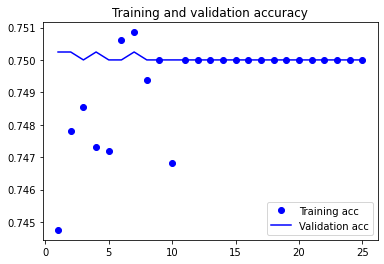

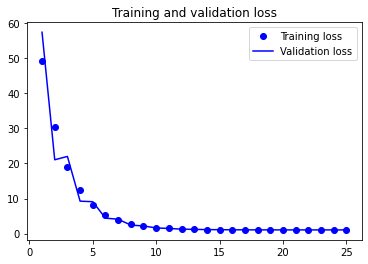

In [ ]:
# #import matplotlib.pyplot as plt 


acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log17

In [ ]:
model.save("alzheimer_model17.h5")

In [ ]:
model.save("log17")

INFO:tensorflow:Assets written to: log17/assets


In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# 9. selu + L1 + BN + Ftrl + lecun_normal

In [ ]:
def conv_block(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')
    ]
    )
    
    return model       

In [ ]:
def dense_block(units):
    model = tf.keras.Sequential([
        #tf.keras.layers.Dense(units, kernel_initializer = 'he_normal', use_bias = False,
        tf.keras.layers.Dense(units, kernel_initializer = 'lecun_normal', use_bias = False,
                              
                              kernel_regularizer = regularizers.L1(0.01)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Activation('elu')
        tf.keras.layers.Activation('selu')
    ])
    
    return model

In [ ]:
NUM_CLASSES = 4

def build_model():
    
    '''Sequential Model creation'''
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, padding = 'same', input_shape = (224, 224, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    
        conv_block(32),    
        conv_block(64),
        conv_block(128),
        conv_block(256),
            
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
    
        dense_block(128),
        dense_block(64),
        dense_block(32),
    
        tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
    ])
        
    return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 56, 56, 32)        2032      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 64)        7136      
                                                                 
 sequential_2 (Sequential)   (None, 14, 14, 128)       26560     
                                                                 
 sequential_3 (Sequential)   (None, 7, 7, 256)         102272    
                                                      

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model18.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     #patience = 3,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log18')

In [ ]:
# FTRL optimiser  <https://keras.io/api/optimizers/ftrl/>

model.compile(optimizer = tf.keras.optimizers.Ftrl(
    #learning_rate = 0.001,
    learning_rate_power = -0.5,
    initial_accumulator_value = 0.1,
    l1_regularization_strength = 0.0,   # 10 might be too ig a number???
    l2_regularization_strength = 0.0,
    name = 'Ftrl',
    l2_shrinkage_regularization_strength = 0.0,
    beta = 0.0),
    #beta = 0.0,
    #**kwargs), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
%time


EPOCHS = 100

history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    #batch_size = 32,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Epoch 1/100
129/129 [==============================] - 61s 449ms/step - loss: 3.4103 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7620 - f1_score: 0.0000e+00 - val_loss: 1.4206 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_score: 0.0000e+00 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 57s 438ms/step - loss: 1.3407 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7794 - f1_score: 0.0000e+00 - val_loss: 1.2790 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_score: 0.0000e+00 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 56s 437ms/step - loss: 1.3335 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7793 - f1_score: 0.0000e+00 - val_loss: 1.3504 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - 

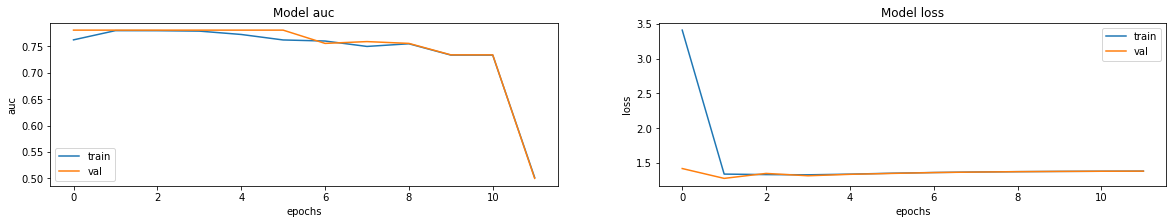

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# This shows underfitting.

In [ ]:
_ = model.evaluate(test_dataset)

40/40 [==============================] - 2s 52ms/step - loss: 1.2789 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00


In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

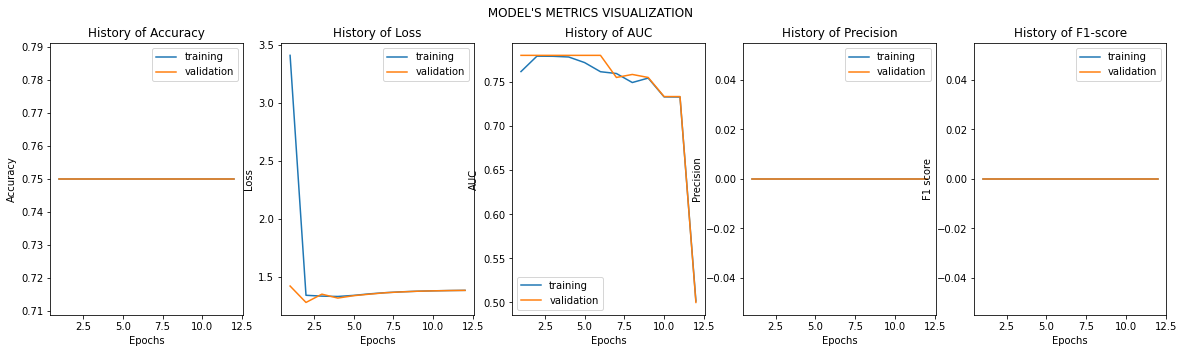

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.75
Precision =  0.0
Recall =  0.0
AUC =  0.7805577516555786
F1_score =  0.0


In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 49s 376ms/step - loss: 1.2792 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7797 - f1_score: 0.0000e+00
Accuracy on training data: 0.75% 
 Error on training data: 0.25


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 2s 51ms/step - loss: 1.2789 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00
Accuracy on test data: 0.75% 
 Error on test data: 0.25


In [ ]:
'''
PK:

Train auc: 0.7797 vis-à-vis Test auc: 0.7806.

There is a little underfitting.

'''

In [ ]:
# %tensorboard --logdir log17

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log12

In [ ]:
model.save("alzheimer_model18.h5")

In [ ]:
model.save("log18")

INFO:tensorflow:Assets written to: log18/assets


In [ ]:
# 10. selu + L1 + BN + Nadam + lecun_normal

In [ ]:
def conv_block(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')
    ]
    )
    
    return model       

In [ ]:
def dense_block(units):
    model = tf.keras.Sequential([
        #tf.keras.layers.Dense(units, kernel_initializer = 'he_normal', use_bias = False,
        tf.keras.layers.Dense(units, kernel_initializer = 'lecun_normal', use_bias = False,
                              
                              kernel_regularizer = regularizers.L1(0.01)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Activation('elu')
        tf.keras.layers.Activation('selu')
    ])
    
    return model

In [ ]:
NUM_CLASSES = 4

def build_model():
    
    '''Sequential Model creation'''
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, padding = 'same', input_shape = (224, 224, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    
        conv_block(32),    
        conv_block(64),
        conv_block(128),
        conv_block(256),
            
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
    
        dense_block(512),
        dense_block(128),
        dense_block(64),
    
        tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
    ])
        
    return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 sequential_4 (Sequential)   (None, 56, 56, 32)        2032      
                                                                 
 sequential_5 (Sequential)   (None, 28, 28, 64)        7136      
                                                                 
 sequential_6 (Sequential)   (None, 14, 14, 128)       26560     
                                                                 
 sequential_7 (Sequential)   (None, 7, 7, 256)         102272    
                                                     

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model19.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     #patience = 3,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log19')

In [ ]:
# Test 3, Test 4, Test 5, Test 6_2, Test 6_3, Test 6_4, Test 6_7, Final Test1?, 3, 4

model.compile(optimizer = tf.keras.optimizers.Nadam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    #amsgrad=False,
    name = 'Nadam',), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
%time


EPOCHS = 100

history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    #batch_size = 32,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epoch 1/100
129/129 [==============================] - 73s 435ms/step - loss: 49.1578 - accuracy: 0.7448 - precision: 0.4695 - recall: 0.1618 - auc: 0.7684 - f1_score: 0.1616 - val_loss: 57.4491 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5006 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 56s 434ms/step - loss: 30.3356 - accuracy: 0.7478 - precision: 0.4894 - recall: 0.2028 - auc: 0.7786 - f1_score: 0.2013 - val_loss: 21.0550 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5004 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 55s 426ms/step - loss: 19.1226 - accuracy: 0.7485 - precision: 0.4933 - recall: 0.2157 - auc: 0.7773 - f1_score: 0.2141 - val_loss: 22.0016 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_scor

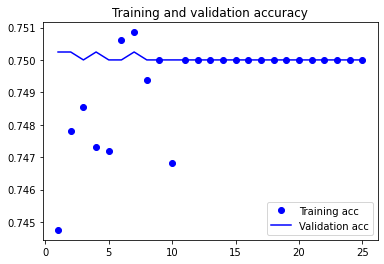

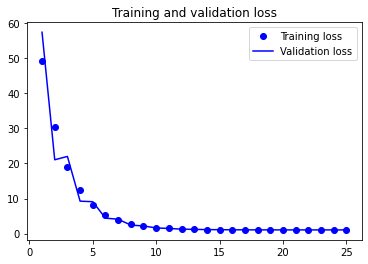

In [ ]:
# #import matplotlib.pyplot as plt 

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

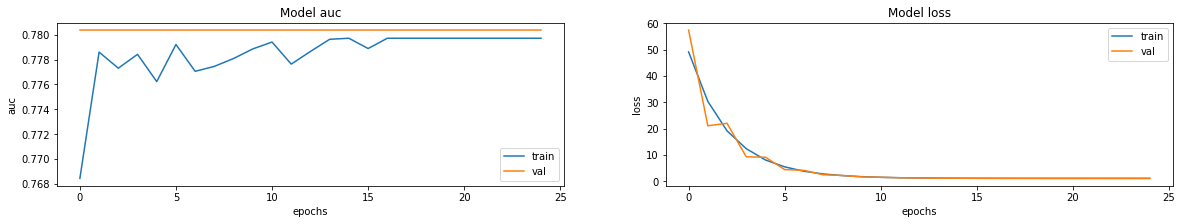

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# This shows underfitting.

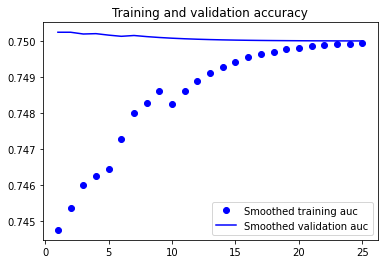

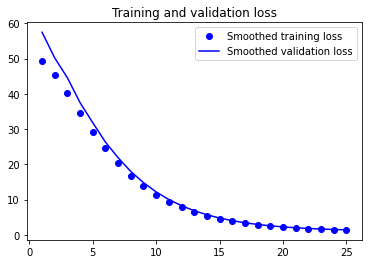

In [ ]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points: 
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor)) 
    else:
      smoothed_points.append(point) 
  
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training auc')

plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation auc')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')

plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
_ = model.evaluate(test_dataset)

40/40 [==============================] - 2s 49ms/step - loss: 1.0952 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00


In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

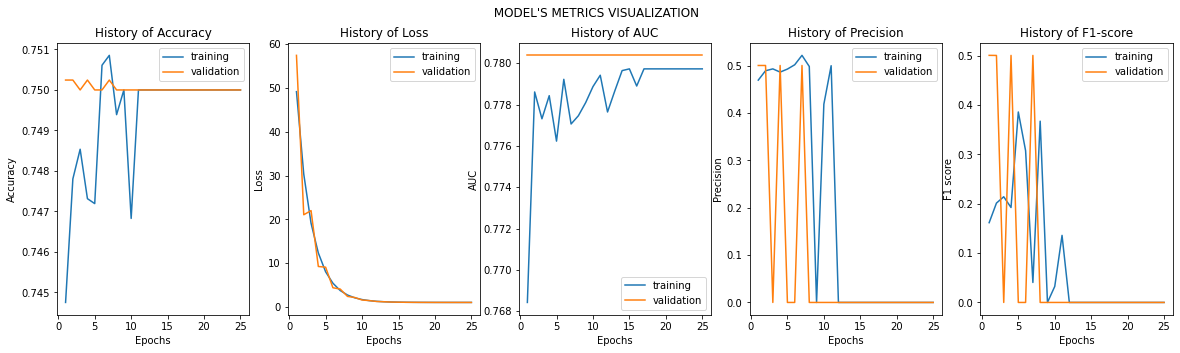

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.75
Precision =  0.0
Recall =  0.0
AUC =  0.7805577516555786
F1_score =  0.0


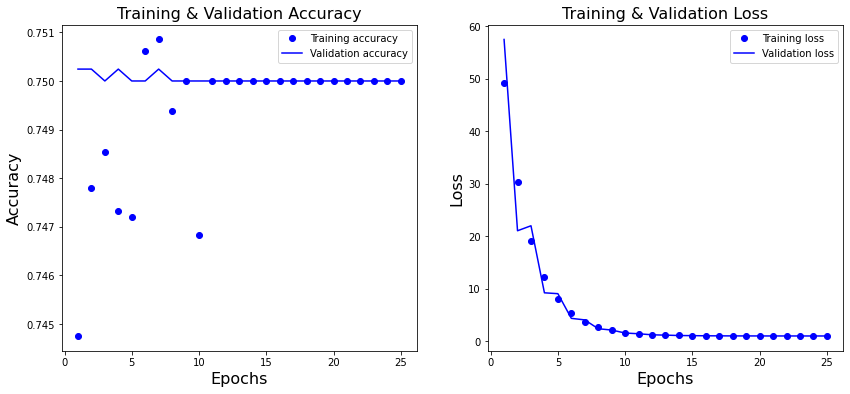

In [ ]:
#import matplotlib.pyplot as plt
  
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y = history.history['loss'], name = 'Train'))
fig.add_trace(go.Scattergl(y = history.history['val_loss'], name = 'Valid'))
fig.update_layout(height = 500, width = 700, xaxis_title = 'Epoch', yaxis_title = 'Loss')
fig.show()

In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 49s 377ms/step - loss: 1.0986 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7797 - f1_score: 0.0000e+00
Accuracy on training data: 0.75% 
 Error on training data: 0.25


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 2s 50ms/step - loss: 1.0952 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00
Accuracy on test data: 0.75% 
 Error on test data: 0.25


In [ ]:
'''
PK:

Train auc: 0.7797 vis-à-vis Test auc: 0.7806.

There is a little underfitting.

'''

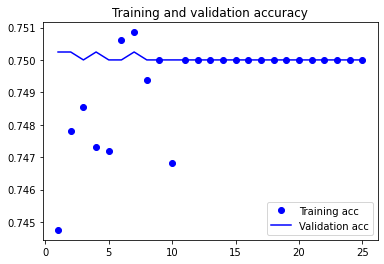

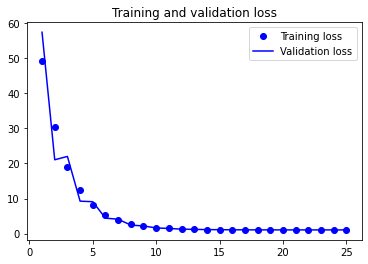

In [ ]:
# #import matplotlib.pyplot as plt 

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log17

In [ ]:
model.save("alzheimer_model19.h5")

In [ ]:
model.save("log19")

INFO:tensorflow:Assets written to: log19/assets


In [ ]:
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# 11. selu + L1 + BN + Ftrl + lecun_normal

In [ ]:
def conv_block(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')
    ]
    )
    
    return model       

In [ ]:
def dense_block(units):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units, kernel_initializer = 'lecun_normal', use_bias = False,
                              
                            kernel_regularizer = regularizers.L1(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('selu')
    ])
    
    return model

In [ ]:
NUM_CLASSES = 4

def build_model():
    
    '''Sequential Model creation'''
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, padding = 'same', input_shape = (224, 224, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    
        conv_block(32),    
        conv_block(64),
        conv_block(128),
        conv_block(256),
            
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
    
        dense_block(512),
        dense_block(128),
        dense_block(64),
    
        tf.keras.layers.Dense(NUM_CLASSES, activation = 'softmax')
    ])
        
    return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 sequential_4 (Sequential)   (None, 56, 56, 32)        2032      
                                                                 
 sequential_5 (Sequential)   (None, 28, 28, 64)        7136      
                                                                 
 sequential_6 (Sequential)   (None, 14, 14, 128)       26560     
                                                                 
 sequential_7 (Sequential)   (None, 7, 7, 256)         102272    
                                                     

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model17.h5",
                                                    save_best_only = True)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'auc',
                                                     patience = 10,
                                                     #patience = 3,
                                                     restore_best_weights = True)

In [ ]:
tensorboard_cb = TensorBoard(log_dir = 'log17')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Nadam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    #amsgrad=False,
    name = 'Nadam',), 
    loss = 'categorical_crossentropy',
    metrics = METRICS)

In [ ]:
%time


EPOCHS = 100

history = model.fit(train_dataset,
                    validation_data = valid_dataset,
                    #batch_size = 32,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler, tensorboard_cb])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epoch 1/100
129/129 [==============================] - 73s 435ms/step - loss: 49.1578 - accuracy: 0.7448 - precision: 0.4695 - recall: 0.1618 - auc: 0.7684 - f1_score: 0.1616 - val_loss: 57.4491 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5006 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 56s 434ms/step - loss: 30.3356 - accuracy: 0.7478 - precision: 0.4894 - recall: 0.2028 - auc: 0.7786 - f1_score: 0.2013 - val_loss: 21.0550 - val_accuracy: 0.7502 - val_precision: 0.5005 - val_recall: 0.5005 - val_auc: 0.7804 - val_f1_score: 0.5004 - lr: 0.0063
Epoch 3/100
129/129 [==============================] - 55s 426ms/step - loss: 19.1226 - accuracy: 0.7485 - precision: 0.4933 - recall: 0.2157 - auc: 0.7773 - f1_score: 0.2141 - val_loss: 22.0016 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_scor

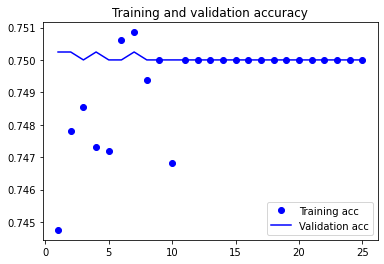

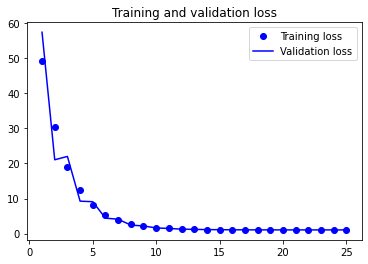

In [ ]:
# #import matplotlib.pyplot as plt 

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

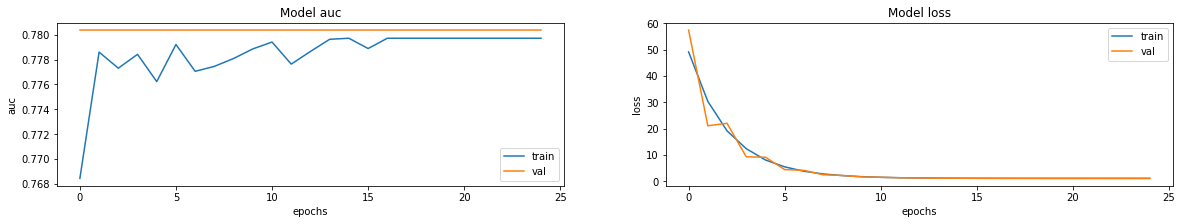

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    #ax[i].plot(history.history[met])
    #ax[i].plot(history.history['val_' + met])
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])    

In [ ]:
# This shows underfitting.

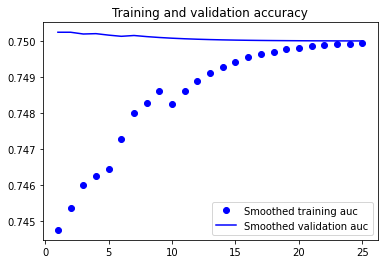

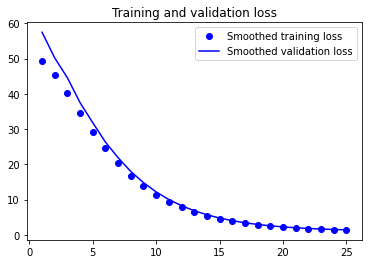

In [ ]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points: 
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor)) 
    else:
      smoothed_points.append(point) 
  
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training auc')

plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation auc')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')

plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
_ = model.evaluate(test_dataset)

40/40 [==============================] - 2s 49ms/step - loss: 1.0952 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00


In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()

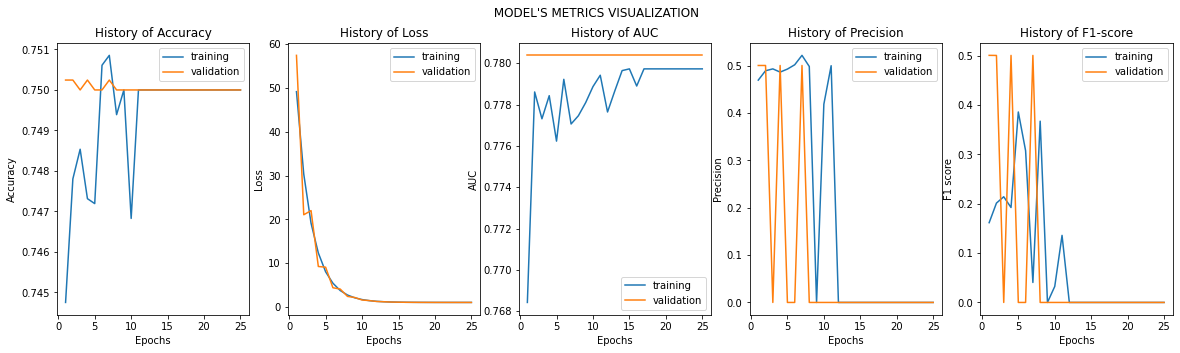

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
scores = model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.75
Precision =  0.0
Recall =  0.0
AUC =  0.7805577516555786
F1_score =  0.0


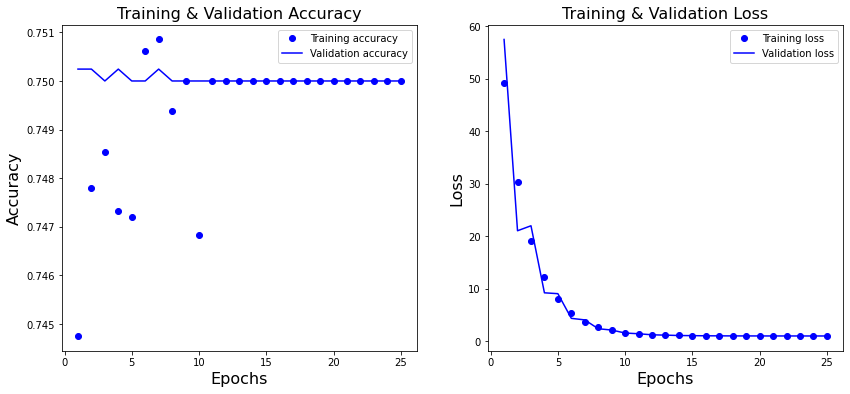

In [ ]:
#import matplotlib.pyplot as plt
  
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y = history.history['loss'], name = 'Train'))
fig.add_trace(go.Scattergl(y = history.history['val_loss'], name = 'Valid'))
fig.update_layout(height = 500, width = 700, xaxis_title = 'Epoch', yaxis_title = 'Loss')
fig.show()

In [ ]:
scores1 = model.evaluate(train_dataset, verbose = 1)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores1[1], 1 - scores1[1]))

129/129 [==============================] - 49s 377ms/step - loss: 1.0986 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7797 - f1_score: 0.0000e+00
Accuracy on training data: 0.75% 
 Error on training data: 0.25


In [ ]:
scores2 = model.evaluate(test_dataset, verbose = 1)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

40/40 [==============================] - 2s 50ms/step - loss: 1.0952 - accuracy: 0.7500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7806 - f1_score: 0.0000e+00
Accuracy on test data: 0.75% 
 Error on test data: 0.25


In [ ]:
'''
PK:

Train auc: 0.7797 vis-à-vis Test auc: 0.7806.

There is a little underfitting.

'''

In [ ]:
# %tensorboard --logdir log17

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log17

In [ ]:
model.save("alzheimer_model17.h5")

In [ ]:
model.save("log17")

INFO:tensorflow:Assets written to: log17/assets
